# **One day Forex Price Prediction**

#**Using Model** 
####RNN(Recurrent Neural Network)
####LSTM(Long Short Term Memory)
####GRU(Gated Recurrent Unit)


In [93]:
import numpy
import pandas
import pandas as pd
import pandas as np
import numpy as np
import csv
import math
import datetime
import scipy
import tqdm
import keras
import tensorflow as tf
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
import seaborn as seabornInstance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import SimpleRNN
from keras.layers.recurrent import GRU
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
%matplotlib inline
#import matplotlib.cbook as cbook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from tqdm import tqdm_notebook
from sklearn import metrics
from math import sqrt
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.metrics import val_mean_absolute_percentage_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [94]:
df1 = pd.read_csv('EURUSD_Price.csv', date_parser=True)
df1.head(240)

Date      Open      High       Low     Close  Adj Close  Volume
0    2003-12-01  1.203398  1.204007  1.194401  1.196501   1.196501     0.0
1    2003-12-02  1.196101  1.210903  1.194600  1.208897   1.208897     0.0
2    2003-12-03  1.209000  1.213003  1.207700  1.212298   1.212298     0.0
3    2003-12-04  1.212004  1.214403  1.204398  1.208094   1.208094     0.0
4    2003-12-05  1.207802  1.219096  1.206593  1.218695   1.218695     0.0
..          ...       ...       ...       ...       ...        ...     ...
235  2004-10-25  1.272993  1.283005  1.272799  1.281099   1.281099     0.0
236  2004-10-26  1.281000  1.284307  1.273399  1.276503   1.276503     0.0
237  2004-10-27  1.276503  1.280902  1.269906  1.270600   1.270600     0.0
238  2004-10-28       NaN       NaN       NaN       NaN        NaN     NaN
239  2004-10-29  1.270793  1.279803  1.266207  1.279198   1.279198     0.0

[240 rows x 7 columns]

In [95]:
df1.tail()

Date      Open      High       Low     Close  Adj Close  Volume
4602  2021-07-21  1.178550  1.180275  1.175364  1.178411   1.178411     0.0
4603  2021-07-22  1.179523  1.182984  1.176664  1.179273   1.179273     0.0
4604  2021-07-23  1.177357  1.178550  1.175599  1.177274   1.177274     0.0
4605  2021-07-26  1.177302  1.181754  1.176457  1.177343   1.177343     0.0
4606  2021-07-27  1.180777  1.182452  1.177440  1.182452   1.182452     0.0

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4607 entries, 0 to 4606
Data columns (total 7 columns):
Date         4607 non-null object
Open         4558 non-null float64
High         4558 non-null float64
Low          4558 non-null float64
Close        4558 non-null float64
Adj Close    4558 non-null float64
Volume       4558 non-null float64
dtypes: float64(6), object(1)
memory usage: 252.1+ KB


In [97]:
df1.describe()

Open         High          Low        Close    Adj Close  Volume
count  4558.000000  4558.000000  4558.000000  4558.000000  4558.000000  4558.0
mean      1.258557     1.263319     1.253344     1.258584     1.258584     0.0
std       0.119250     0.119972     0.119889     0.119239     0.119239     0.0
min       1.039393     1.041992     0.072902     1.039047     1.039047     0.0
25%       1.161363     1.165023     1.157066     1.161504     1.161504     0.0
50%       1.253997     1.260756     1.249141     1.254352     1.254352     0.0
75%       1.342873     1.347332     1.337276     1.342805     1.342805     0.0
max       1.598184     1.602821     1.587402     1.598798     1.598798     0.0

In [98]:
df1.shape

(4607, 7)

In [99]:
#df1 = df1.dropna(axis=0)
# Drop column_1 rows with null values
#df1['Open'] = df1['Open'].dropna(axis=0)
#df1['High'] = df1['High'].dropna(axis=0)
#df1['Low'] = df1['Low'].dropna(axis=0)
#df1['Close'] = df1['Close'].dropna(axis=0)
#df1['Adj Close'] = df1['Adj Close'].dropna(axis=0)
#df1['Volume'] = df1['Volume'].dropna(axis=0)

In [100]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df1.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df1.apply(num_missing, axis=1).head())

Missing values per column:
Date          0
Open         49
High         49
Low          49
Close        49
Adj Close    49
Volume       49
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [101]:
#df1["Open"].replace(to_replace = np.nan, value = 1.258557)
#df1["High"].replace(to_replace = np.nan, value = 1.263319) 
#df1["Low"].replace(to_replace = np.nan, value = 1.253344) 
#df1["Close"].replace(to_replace = np.nan, value = 1.258584) 
#df1["Adj Close"].replace(to_replace = np.nan, value = 1.258584) 
#df1["Volume"].replace(to_replace = np.nan, value = 0.0) 

#print(df1.head(10))
#print(df1.tail(10))


In [102]:
#df1["Open"].replace("1.258557", inplace = True)
#df1["High"].replace("1.263319", inplace = True)
#df1["Low"].replace("1.253344", inplace = True)
#df1["Close"].replace("1.258584", inplace = True)
#df1["Adj Close"].replace("1.258584", inplace = True)
#df1["Volume"].replace("0.0", inplace = True)
#print(df1.head(10))
#print(df1.tail(10))

In [103]:
df1["Open"].fillna("1.258557", inplace = True)
df1["High"].fillna("1.263319", inplace = True)
df1["Low"].fillna("1.253344", inplace = True)
df1["Close"].fillna("1.258584", inplace = True)
df1["Adj Close"].fillna("1.258584", inplace = True)
df1["Volume"].fillna("0.0", inplace = True)
#print(df1.head(10))
#print(df1.tail(10))

In [104]:
#df1[['Open']] = df1[['Open']].replace(1.258557)
#df1[['High']] = df1[['High']].replace(1.263319)
#df1[['Low']] = df1[['Low']].replace(1.253344)
#df1[['Close']] = df1[['Close']].replace(1.258584)
#df1[['Adj Close']] = df1[['Adj Close']].replace(1.258584)
#df1[['Volume']] = df1[['Volume']].replace(0.0)
# print the first 10 rows of data
#print(df1.head(10))

#df1.dropna(inplace=True)

In [105]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df1.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df1.apply(num_missing, axis=1).head())

Missing values per column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [106]:
print(df1.head(10))
print(df1.tail(10))

         Date    Open     High      Low    Close Adj Close Volume
0  2003-12-01  1.2034  1.20401   1.1944   1.1965    1.1965      0
1  2003-12-02  1.1961   1.2109   1.1946   1.2089    1.2089      0
2  2003-12-03   1.209    1.213   1.2077   1.2123    1.2123      0
3  2003-12-04   1.212   1.2144   1.2044  1.20809   1.20809      0
4  2003-12-05  1.2078   1.2191  1.20659   1.2187    1.2187      0
5  2003-12-08  1.2168  1.22401  1.21541    1.222     1.222      0
6  2003-12-09  1.2221   1.2277  1.21979    1.225     1.225      0
7  2003-12-10  1.2249   1.2266   1.2162   1.2191    1.2191      0
8  2003-12-11  1.2191   1.2235   1.2123   1.2224    1.2224      0
9  2003-12-12  1.2227   1.2306   1.2213   1.2279    1.2279      0
            Date     Open     High      Low    Close Adj Close Volume
4597  2021-07-14  1.17744   1.1828  1.17726  1.17754   1.17754      0
4598  2021-07-15  1.18333  1.18511   1.1806  1.18333   1.18333      0
4599  2021-07-16  1.18131   1.1823   1.1794  1.18118   1.18118  

In [107]:
df1["Date"] = pd.to_datetime(df1["Date"])
df1.head(10)

Date    Open     High      Low    Close Adj Close Volume
0 2003-12-01  1.2034  1.20401   1.1944   1.1965    1.1965      0
1 2003-12-02  1.1961   1.2109   1.1946   1.2089    1.2089      0
2 2003-12-03   1.209    1.213   1.2077   1.2123    1.2123      0
3 2003-12-04   1.212   1.2144   1.2044  1.20809   1.20809      0
4 2003-12-05  1.2078   1.2191  1.20659   1.2187    1.2187      0
5 2003-12-08  1.2168  1.22401  1.21541    1.222     1.222      0
6 2003-12-09  1.2221   1.2277  1.21979    1.225     1.225      0
7 2003-12-10  1.2249   1.2266   1.2162   1.2191    1.2191      0
8 2003-12-11  1.2191   1.2235   1.2123   1.2224    1.2224      0
9 2003-12-12  1.2227   1.2306   1.2213   1.2279    1.2279      0

In [34]:
df1.set_index('Date',inplace=True)
df1.sort_values('Date',ascending=True)

Open     High      Low    Close Adj Close Volume
Date                                                           
2003-12-01   1.2034  1.20401   1.1944   1.1965    1.1965      0
2003-12-02   1.1961   1.2109   1.1946   1.2089    1.2089      0
2003-12-03    1.209    1.213   1.2077   1.2123    1.2123      0
2003-12-04    1.212   1.2144   1.2044  1.20809   1.20809      0
2003-12-05   1.2078   1.2191  1.20659   1.2187    1.2187      0
...             ...      ...      ...      ...       ...    ...
2021-07-21  1.17855  1.18027  1.17536  1.17841   1.17841      0
2021-07-22  1.17952  1.18298  1.17666  1.17927   1.17927      0
2021-07-23  1.17736  1.17855   1.1756  1.17727   1.17727      0
2021-07-26   1.1773  1.18175  1.17646  1.17734   1.17734      0
2021-07-27  1.18078  1.18245  1.17744  1.18245   1.18245      0

[4607 rows x 6 columns]

**Open, High, Low, Close Price History in Plot**

C:\Users\Polash Dey\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


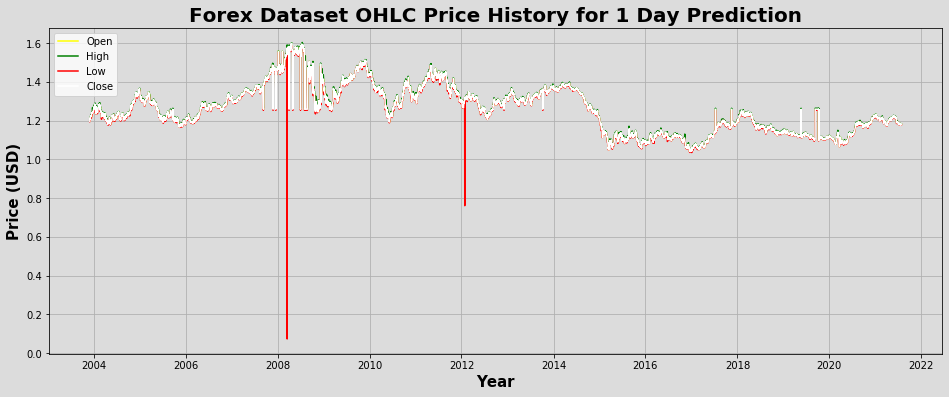

In [35]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#dcdcdc')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#dcdcdc')
plt.plot(df1["Open"], color = 'yellow')
plt.plot(df1["High"], color = 'green')
plt.plot(df1["Low"], color = 'red')
plt.plot(df1["Close"],color = 'white')
plt.title('Forex Dataset OHLC Price History for 1 Day Prediction',fontsize=20,fontweight = "bold")
plt.ylabel('Price (USD)', fontsize=15,fontweight = "bold")
plt.xlabel('Year',fontsize=15,fontweight = "bold")
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.grid()
plt.show()

**Volume History in Plot**

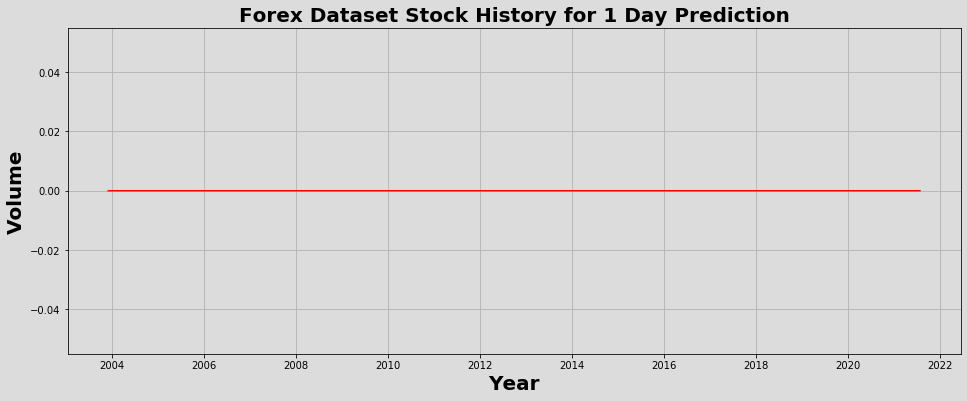

In [36]:
  #plt.figure()
plt.figure(figsize = (16,6), facecolor = '#dcdcdc')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#dcdcdc')
plt.plot(df1["Volume"], color = 'red')
plt.title('Forex Dataset Stock History for 1 Day Prediction', fontsize=20,fontweight = "bold")
plt.ylabel('Volume', fontsize=20,fontweight = "bold")
plt.xlabel('Year', fontsize=20,fontweight = "bold")
plt.grid()
plt.show()

**Closing Price History**

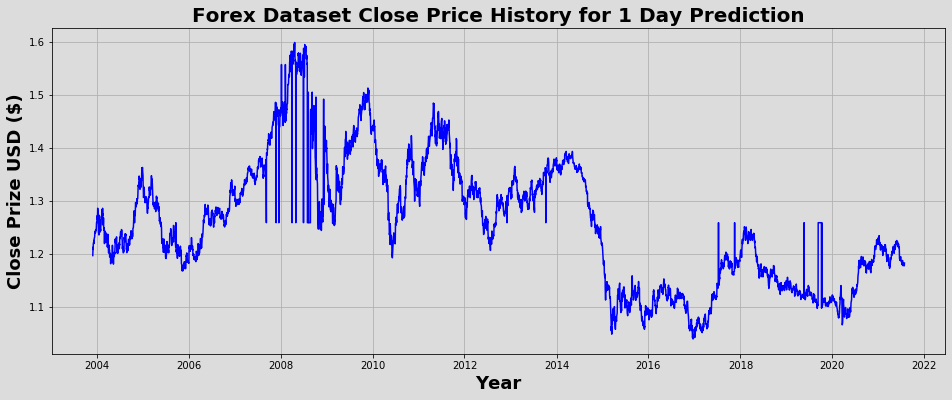

In [37]:
plt.figure(figsize = (16,6), facecolor = '#dcdcdc')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#dcdcdc')
plt.title('Forex Dataset Close Price History for 1 Day Prediction',fontsize=20,fontweight = "bold")
plt.plot(df1['Close'], color = 'blue',)
plt.xlabel("Year" , fontsize = 18, fontweight = "bold")
plt.ylabel("Close Prize USD ($)" , fontsize = 18, fontweight = "bold")
plt.grid()
plt.show()

#plt.plot(y_test, color = 'red', label = 'Real HMC Stock Price')

In [38]:
training_1 = df1[df1.index < datetime.datetime(year=2018, month=1, day=11)]
training_1

Open     High      Low    Close Adj Close Volume
Date                                                           
2003-12-01   1.2034  1.20401   1.1944   1.1965    1.1965      0
2003-12-02   1.1961   1.2109   1.1946   1.2089    1.2089      0
2003-12-03    1.209    1.213   1.2077   1.2123    1.2123      0
2003-12-04    1.212   1.2144   1.2044  1.20809   1.20809      0
2003-12-05   1.2078   1.2191  1.20659   1.2187    1.2187      0
...             ...      ...      ...      ...       ...    ...
2018-01-04  1.20113  1.20919   1.2005  1.20104   1.20104      0
2018-01-05  1.20662  1.20846  1.20215  1.20688   1.20688      0
2018-01-08  1.20395   1.2054  1.19597  1.20375   1.20375      0
2018-01-09  1.19696  1.19758   1.1918  1.19705   1.19705      0
2018-01-10  1.19293  1.20163  1.19245  1.19293   1.19293      0

[3683 rows x 6 columns]

In [39]:
testing_1 = df1[df1.index >= datetime.datetime(year=2018, month=1, day=11)]
testing_1

Open     High      Low    Close Adj Close Volume
Date                                                           
2018-01-11  1.19549  1.20592  1.19312  1.19561   1.19561      0
2018-01-12  1.20421  1.21561  1.20414  1.20421   1.20421      0
2018-01-15   1.2193   1.2299  1.21881  1.21923   1.21923      0
2018-01-16  1.22699  1.22812  1.21968  1.22684   1.22684      0
2018-01-17  1.22714  1.23215  1.21991  1.22713   1.22713      0
...             ...      ...      ...      ...       ...    ...
2021-07-21  1.17855  1.18027  1.17536  1.17841   1.17841      0
2021-07-22  1.17952  1.18298  1.17666  1.17927   1.17927      0
2021-07-23  1.17736  1.17855   1.1756  1.17727   1.17727      0
2021-07-26   1.1773  1.18175  1.17646  1.17734   1.17734      0
2021-07-27  1.18078  1.18245  1.17744  1.18245   1.18245      0

[924 rows x 6 columns]

**Training & Testing Combination**

<function matplotlib.pyplot.show(*args, **kw)>

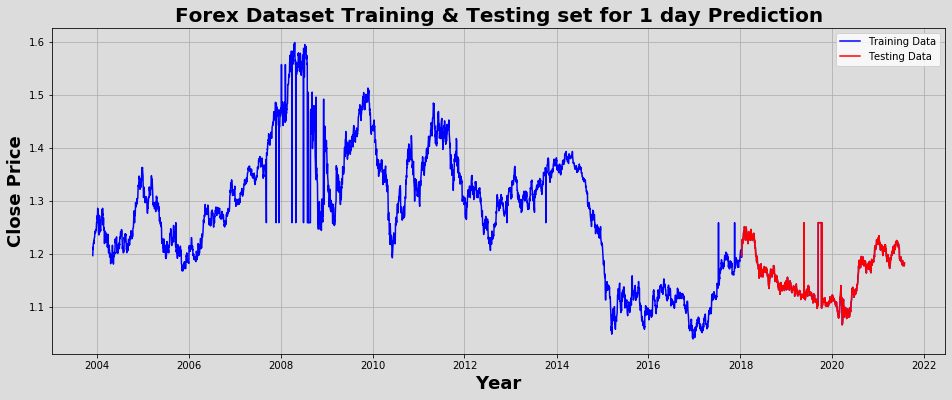

In [40]:
plt.figure(figsize = (16,6), facecolor = '#dcdcdc')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#dcdcdc')
training_1, testing_1 = df1[df1.index < datetime.datetime(year=2018, month=1, day=11)], df1[df1.index >= datetime.datetime(year=2018, month=1, day=11)]
#plt.figure(figsize=(12,7))
plt.title('Forex Dataset Training & Testing set for 1 day Prediction', fontsize = 20,fontweight = "bold")
plt.xlabel('Year' , fontsize = 18,fontweight = "bold")
plt.ylabel('Close Price', fontsize = 18,fontweight = "bold")
plt.plot(df1['Close'], 'blue', label='Training Data')
plt.plot(testing_1['Close'], 'red', label='Testing Data')
#plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()
plt.grid()
plt.show

In [41]:
training_length_1 = training_1.filter(['Close'])
training_length_1

Close
Date               
2003-12-01   1.1965
2003-12-02   1.2089
2003-12-03   1.2123
2003-12-04  1.20809
2003-12-05   1.2187
...             ...
2018-01-04  1.20104
2018-01-05  1.20688
2018-01-08  1.20375
2018-01-09  1.19705
2018-01-10  1.19293

[3683 rows x 1 columns]

In [42]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date               
2018-01-11  1.19561
2018-01-12  1.20421
2018-01-15  1.21923
2018-01-16  1.22684
2018-01-17  1.22713
...             ...
2021-07-21  1.17841
2021-07-22  1.17927
2021-07-23  1.17727
2021-07-26  1.17734
2021-07-27  1.18245

[924 rows x 1 columns]

In [43]:
sc = MinMaxScaler(feature_range=(0,1))
training_length_scaled_1 = sc.fit_transform(training_length_1)
training_length_scaled_1

array([[0.28129293],
       [0.30343849],
       [0.30951441],
       ...,
       [0.29423619],
       [0.28226658],
       [0.27491867]])

In [44]:
X_train_1 = []
y_train_1 = []
#length_TF_1 = len(testing_length_TF_1)
for i in range(30, 3683):
    X_train_1.append(training_length_scaled_1[i-30:i, 0])
    y_train_1.append(training_length_scaled_1[i, 0])
X_train_1, y_train_1 = np.array(X_train_1), np.array(y_train_1)
print (X_train_1[0])
print ('\n')
print (y_train_1[0])

[0.28129293 0.30343849 0.30951441 0.30200393 0.3209427  0.3268489
 0.33219771 0.32165909 0.32756887 0.33738394 0.34470684 0.34506057
 0.35936515 0.36310967 0.35631915 0.35881669 0.35900963 0.36847098
 0.36758487 0.36471038 0.37399844 0.38561253 0.39295151 0.39150801
 0.39150801 0.4102735  0.41635656 0.4020502  0.42599477 0.44099073]


0.4199170702687445


In [45]:
X_train_1.shape

(3653, 30)

In [46]:
X_train_1 = np.reshape(X_train_1, (X_train_1.shape[0], X_train_1.shape[1], 1))
X_train_1.shape

(3653, 30, 1)

**Build RNN MOdel**

In [47]:
#The RNN Model Build
regressorRNN_1 = Sequential()
regressorRNN_1.add(SimpleRNN(units=64, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorRNN_1.add(Dropout(0.2))
regressorRNN_1.add(SimpleRNN(units=64))
regressorRNN_1.add(Dropout(0.2))
regressorRNN_1.add(Dense(units=1, activation='relu'))
# Compiling the RNN
regressorRNN_1.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorRNN_1.summary()

# Fitting to the training set
history_1 = regressorRNN_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64)

# from keras.callbacks import ModelCheckpoint
# checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mean_squared_error', verbose=1, save_best_only=True, mode='min')

# callbacks_list = [checkpoint]
# history = regressorRNN_1.fit(X_train_1, y_train_1, epochs=100, batch_size=64, verbose=1, callbacks=callbacks_list, validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 30, 64)            4224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3653/3653 [==============================] - ETA: 2:32 - loss: 0.2315 - mae: 0.4342 - mse: 0.231 - ETA: 

3653/3653 [==============================] - ETA: 2s - loss: 0.0036 - mae: 0.0448 - mse: 0.003 - ETA: 2s - loss: 0.0046 - mae: 0.0508 - mse: 0.004 - ETA: 3s - loss: 0.0068 - mae: 0.0566 - mse: 0.006 - ETA: 3s - loss: 0.0063 - mae: 0.0541 - mse: 0.006 - ETA: 2s - loss: 0.0061 - mae: 0.0545 - mse: 0.006 - ETA: 2s - loss: 0.0057 - mae: 0.0533 - mse: 0.005 - ETA: 2s - loss: 0.0054 - mae: 0.0522 - mse: 0.005 - ETA: 2s - loss: 0.0053 - mae: 0.0522 - mse: 0.005 - ETA: 2s - loss: 0.0054 - mae: 0.0530 - mse: 0.005 - ETA: 2s - loss: 0.0055 - mae: 0.0537 - mse: 0.005 - ETA: 2s - loss: 0.0054 - mae: 0.0533 - mse: 0.005 - ETA: 2s - loss: 0.0053 - mae: 0.0528 - mse: 0.005 - ETA: 2s - loss: 0.0054 - mae: 0.0535 - mse: 0.005 - ETA: 2s - loss: 0.0055 - mae: 0.0537 - mse: 0.005 - ETA: 2s - loss: 0.0061 - mae: 0.0547 - mse: 0.006 - ETA: 2s - loss: 0.0060 - mae: 0.0545 - mse: 0.006 - ETA: 2s - loss: 0.0059 - mae: 0.0541 - mse: 0.005 - ETA: 2s - loss: 0.0059 - mae: 0.0545 - mse: 0.005 - ETA: 2s - loss: 0.0

3653/3653 [==============================] - ETA: 2s - loss: 0.0065 - mae: 0.0529 - mse: 0.006 - ETA: 2s - loss: 0.0049 - mae: 0.0486 - mse: 0.004 - ETA: 3s - loss: 0.0044 - mae: 0.0468 - mse: 0.004 - ETA: 3s - loss: 0.0040 - mae: 0.0448 - mse: 0.004 - ETA: 3s - loss: 0.0038 - mae: 0.0439 - mse: 0.003 - ETA: 3s - loss: 0.0052 - mae: 0.0465 - mse: 0.005 - ETA: 3s - loss: 0.0051 - mae: 0.0469 - mse: 0.005 - ETA: 3s - loss: 0.0050 - mae: 0.0473 - mse: 0.005 - ETA: 3s - loss: 0.0051 - mae: 0.0485 - mse: 0.005 - ETA: 3s - loss: 0.0050 - mae: 0.0480 - mse: 0.005 - ETA: 3s - loss: 0.0050 - mae: 0.0488 - mse: 0.005 - ETA: 3s - loss: 0.0048 - mae: 0.0481 - mse: 0.004 - ETA: 3s - loss: 0.0047 - mae: 0.0479 - mse: 0.004 - ETA: 3s - loss: 0.0047 - mae: 0.0485 - mse: 0.004 - ETA: 3s - loss: 0.0047 - mae: 0.0485 - mse: 0.004 - ETA: 2s - loss: 0.0048 - mae: 0.0486 - mse: 0.004 - ETA: 2s - loss: 0.0048 - mae: 0.0486 - mse: 0.004 - ETA: 2s - loss: 0.0047 - mae: 0.0487 - mse: 0.004 - ETA: 2s - loss: 0.0

3653/3653 [==============================] - ETA: 2s - loss: 0.0033 - mae: 0.0418 - mse: 0.003 - ETA: 3s - loss: 0.0029 - mae: 0.0383 - mse: 0.002 - ETA: 3s - loss: 0.0027 - mae: 0.0380 - mse: 0.002 - ETA: 2s - loss: 0.0036 - mae: 0.0391 - mse: 0.003 - ETA: 2s - loss: 0.0035 - mae: 0.0391 - mse: 0.003 - ETA: 2s - loss: 0.0041 - mae: 0.0403 - mse: 0.004 - ETA: 2s - loss: 0.0038 - mae: 0.0392 - mse: 0.003 - ETA: 2s - loss: 0.0036 - mae: 0.0386 - mse: 0.003 - ETA: 2s - loss: 0.0034 - mae: 0.0384 - mse: 0.003 - ETA: 2s - loss: 0.0037 - mae: 0.0394 - mse: 0.003 - ETA: 2s - loss: 0.0035 - mae: 0.0388 - mse: 0.003 - ETA: 2s - loss: 0.0035 - mae: 0.0391 - mse: 0.003 - ETA: 2s - loss: 0.0034 - mae: 0.0387 - mse: 0.003 - ETA: 2s - loss: 0.0033 - mae: 0.0387 - mse: 0.003 - ETA: 2s - loss: 0.0033 - mae: 0.0388 - mse: 0.003 - ETA: 2s - loss: 0.0035 - mae: 0.0393 - mse: 0.003 - ETA: 2s - loss: 0.0034 - mae: 0.0391 - mse: 0.003 - ETA: 2s - loss: 0.0034 - mae: 0.0389 - mse: 0.003 - ETA: 2s - loss: 0.0

3653/3653 [==============================] - ETA: 2s - loss: 0.0013 - mae: 0.0283 - mse: 0.001 - ETA: 2s - loss: 0.0021 - mae: 0.0319 - mse: 0.002 - ETA: 2s - loss: 0.0025 - mae: 0.0334 - mse: 0.002 - ETA: 2s - loss: 0.0025 - mae: 0.0344 - mse: 0.002 - ETA: 2s - loss: 0.0024 - mae: 0.0346 - mse: 0.002 - ETA: 2s - loss: 0.0024 - mae: 0.0351 - mse: 0.002 - ETA: 2s - loss: 0.0023 - mae: 0.0345 - mse: 0.002 - ETA: 2s - loss: 0.0023 - mae: 0.0343 - mse: 0.002 - ETA: 2s - loss: 0.0022 - mae: 0.0341 - mse: 0.002 - ETA: 2s - loss: 0.0022 - mae: 0.0339 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0338 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0339 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0336 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0332 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0337 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0336 - mse: 0.002 - ETA: 2s - loss: 0.0022 - mae: 0.0338 - mse: 0.002 - ETA: 2s - loss: 0.0022 - mae: 0.0337 - mse: 0.002 - ETA: 2s - loss: 0.0

3653/3653 [==============================] - ETA: 2s - loss: 0.0022 - mae: 0.0336 - mse: 0.002 - ETA: 2s - loss: 0.0018 - mae: 0.0315 - mse: 0.001 - ETA: 2s - loss: 0.0019 - mae: 0.0315 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0303 - mse: 0.001 - ETA: 2s - loss: 0.0019 - mae: 0.0306 - mse: 0.001 - ETA: 2s - loss: 0.0023 - mae: 0.0327 - mse: 0.002 - ETA: 2s - loss: 0.0025 - mae: 0.0331 - mse: 0.002 - ETA: 2s - loss: 0.0025 - mae: 0.0332 - mse: 0.002 - ETA: 2s - loss: 0.0023 - mae: 0.0325 - mse: 0.002 - ETA: 2s - loss: 0.0024 - mae: 0.0327 - mse: 0.002 - ETA: 2s - loss: 0.0024 - mae: 0.0328 - mse: 0.002 - ETA: 2s - loss: 0.0027 - mae: 0.0336 - mse: 0.002 - ETA: 2s - loss: 0.0026 - mae: 0.0337 - mse: 0.002 - ETA: 2s - loss: 0.0026 - mae: 0.0335 - mse: 0.002 - ETA: 2s - loss: 0.0026 - mae: 0.0332 - mse: 0.002 - ETA: 2s - loss: 0.0025 - mae: 0.0331 - mse: 0.002 - ETA: 2s - loss: 0.0027 - mae: 0.0336 - mse: 0.002 - ETA: 2s - loss: 0.0026 - mae: 0.0331 - mse: 0.002 - ETA: 2s - loss: 0.0

3653/3653 [==============================] - ETA: 2s - loss: 0.0016 - mae: 0.0294 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0291 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0279 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0281 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0283 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0279 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0280 - mse: 0.001 - ETA: 2s - loss: 0.0022 - mae: 0.0306 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0302 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0297 - mse: 0.002 - ETA: 2s - loss: 0.0019 - mae: 0.0296 - mse: 0.001 - ETA: 2s - loss: 0.0019 - mae: 0.0292 - mse: 0.001 - ETA: 2s - loss: 0.0020 - mae: 0.0300 - mse: 0.002 - ETA: 2s - loss: 0.0019 - mae: 0.0298 - mse: 0.001 - ETA: 2s - loss: 0.0020 - mae: 0.0304 - mse: 0.002 - ETA: 2s - loss: 0.0023 - mae: 0.0308 - mse: 0.002 - ETA: 2s - loss: 0.0022 - mae: 0.0306 - mse: 0.002 - ETA: 2s - loss: 0.0022 - mae: 0.0308 - mse: 0.002 - ETA: 2s - loss: 0.0

3653/3653 [==============================] - ETA: 2s - loss: 0.0016 - mae: 0.0273 - mse: 0.001 - ETA: 2s - loss: 0.0027 - mae: 0.0294 - mse: 0.002 - ETA: 2s - loss: 0.0024 - mae: 0.0288 - mse: 0.002 - ETA: 2s - loss: 0.0026 - mae: 0.0297 - mse: 0.002 - ETA: 2s - loss: 0.0023 - mae: 0.0301 - mse: 0.002 - ETA: 2s - loss: 0.0026 - mae: 0.0304 - mse: 0.002 - ETA: 2s - loss: 0.0025 - mae: 0.0301 - mse: 0.002 - ETA: 2s - loss: 0.0025 - mae: 0.0302 - mse: 0.002 - ETA: 2s - loss: 0.0024 - mae: 0.0300 - mse: 0.002 - ETA: 2s - loss: 0.0023 - mae: 0.0295 - mse: 0.002 - ETA: 2s - loss: 0.0022 - mae: 0.0295 - mse: 0.002 - ETA: 2s - loss: 0.0022 - mae: 0.0293 - mse: 0.002 - ETA: 2s - loss: 0.0022 - mae: 0.0293 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0292 - mse: 0.002 - ETA: 1s - loss: 0.0021 - mae: 0.0290 - mse: 0.002 - ETA: 1s - loss: 0.0020 - mae: 0.0288 - mse: 0.002 - ETA: 1s - loss: 0.0021 - mae: 0.0288 - mse: 0.002 - ETA: 1s - loss: 0.0021 - mae: 0.0285 - mse: 0.002 - ETA: 1s - loss: 0.0

3653/3653 [==============================] - ETA: 2s - loss: 0.0011 - mae: 0.0231 - mse: 0.001 - ETA: 2s - loss: 9.3416e-04 - mae: 0.0222 - mse: 9.3416e-0 - ETA: 2s - loss: 0.0013 - mae: 0.0247 - mse: 0.0013        - ETA: 2s - loss: 0.0019 - mae: 0.0266 - mse: 0.001 - ETA: 2s - loss: 0.0020 - mae: 0.0269 - mse: 0.002 - ETA: 2s - loss: 0.0019 - mae: 0.0265 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0261 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0258 - mse: 0.001 - ETA: 1s - loss: 0.0016 - mae: 0.0260 - mse: 0.001 - ETA: 1s - loss: 0.0017 - mae: 0.0262 - mse: 0.001 - ETA: 1s - loss: 0.0017 - mae: 0.0260 - mse: 0.001 - ETA: 1s - loss: 0.0017 - mae: 0.0259 - mse: 0.001 - ETA: 1s - loss: 0.0020 - mae: 0.0265 - mse: 0.002 - ETA: 1s - loss: 0.0020 - mae: 0.0266 - mse: 0.002 - ETA: 1s - loss: 0.0019 - mae: 0.0265 - mse: 0.001 - ETA: 1s - loss: 0.0019 - mae: 0.0266 - mse: 0.001 - ETA: 1s - loss: 0.0021 - mae: 0.0267 - mse: 0.002 - ETA: 1s - loss: 0.0020 - mae: 0.0265 - mse: 0.002 - ETA

3653/3653 [==============================] - ETA: 3s - loss: 8.8280e-04 - mae: 0.0235 - mse: 8.8280e-0 - ETA: 3s - loss: 0.0011 - mae: 0.0253 - mse: 0.0011        - ETA: 3s - loss: 0.0011 - mae: 0.0255 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0262 - mse: 0.001 - ETA: 3s - loss: 0.0012 - mae: 0.0263 - mse: 0.001 - ETA: 3s - loss: 0.0012 - mae: 0.0262 - mse: 0.001 - ETA: 3s - loss: 0.0012 - mae: 0.0259 - mse: 0.001 - ETA: 3s - loss: 0.0013 - mae: 0.0266 - mse: 0.001 - ETA: 3s - loss: 0.0014 - mae: 0.0266 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0271 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0271 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0266 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0266 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0268 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0268 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0265 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0267 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0266 - mse: 0.001 - ETA

3653/3653 [==============================] - ETA: 2s - loss: 0.0018 - mae: 0.0297 - mse: 0.001 - ETA: 2s - loss: 0.0020 - mae: 0.0280 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0266 - mse: 0.002 - ETA: 2s - loss: 0.0018 - mae: 0.0255 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0252 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0249 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0245 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0247 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0248 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0246 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0248 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0249 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0248 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0245 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0245 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0241 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0247 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0241 - mse: 0.001 - ETA: 2s - loss: 0.0

Epoch 50/100
3653/3653 [==============================] - ETA: 2s - loss: 0.0013 - mae: 0.0257 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0261 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0242 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0246 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0238 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0246 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0241 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0248 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0252 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0252 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0253 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0259 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0263 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0266 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0264 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0263 - mse: 0.001 - ETA: 2s - loss: 0.0020 - mae: 0.0264 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0265 - mse: 0.002 - ETA: 2

3653/3653 [==============================] - ETA: 2s - loss: 5.8513e-04 - mae: 0.0182 - mse: 5.8513e-0 - ETA: 2s - loss: 5.5018e-04 - mae: 0.0180 - mse: 5.5018e-0 - ETA: 2s - loss: 5.7644e-04 - mae: 0.0185 - mse: 5.7644e-0 - ETA: 2s - loss: 7.0428e-04 - mae: 0.0199 - mse: 7.0428e-0 - ETA: 2s - loss: 8.8260e-04 - mae: 0.0207 - mse: 8.8260e-0 - ETA: 2s - loss: 8.7550e-04 - mae: 0.0210 - mse: 8.7550e-0 - ETA: 2s - loss: 0.0018 - mae: 0.0228 - mse: 0.0018        - ETA: 2s - loss: 0.0017 - mae: 0.0227 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0230 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0231 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0228 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0233 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0232 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0233 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0234 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0233 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0235 - mse: 0.001 - ETA: 2s - loss:

3653/3653 [==============================] - ETA: 2s - loss: 9.2061e-04 - mae: 0.0217 - mse: 9.2061e-0 - ETA: 2s - loss: 8.5895e-04 - mae: 0.0211 - mse: 8.5895e-0 - ETA: 2s - loss: 8.9725e-04 - mae: 0.0213 - mse: 8.9725e-0 - ETA: 2s - loss: 8.9544e-04 - mae: 0.0216 - mse: 8.9544e-0 - ETA: 2s - loss: 0.0014 - mae: 0.0225 - mse: 0.0014        - ETA: 2s - loss: 0.0013 - mae: 0.0224 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0232 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0235 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0231 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0236 - mse: 0.001 - ETA: 1s - loss: 0.0017 - mae: 0.0238 - mse: 0.001 - ETA: 1s - loss: 0.0018 - mae: 0.0241 - mse: 0.001 - ETA: 1s - loss: 0.0018 - mae: 0.0241 - mse: 0.001 - ETA: 1s - loss: 0.0018 - mae: 0.0242 - mse: 0.001 - ETA: 1s - loss: 0.0017 - mae: 0.0240 - mse: 0.001 - ETA: 1s - loss: 0.0017 - mae: 0.0237 - mse: 0.001 - ETA: 1s - loss: 0.0016 - mae: 0.0236 - mse: 0.001 - ETA: 1s - loss: 0.0016 - mae: 0

3653/3653 [==============================] - ETA: 2s - loss: 7.3328e-04 - mae: 0.0217 - mse: 7.3328e-0 - ETA: 2s - loss: 0.0014 - mae: 0.0246 - mse: 0.0014        - ETA: 2s - loss: 0.0020 - mae: 0.0252 - mse: 0.002 - ETA: 2s - loss: 0.0017 - mae: 0.0241 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0247 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0247 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0246 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0247 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0243 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0238 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0237 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0238 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0234 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0232 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0227 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0227 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0228 - mse: 0.001 - ETA: 2s - loss: 0.0013 - mae: 0.0228 - mse: 0.001 - ETA

3653/3653 [==============================] - ETA: 2s - loss: 8.9181e-04 - mae: 0.0234 - mse: 8.9181e-0 - ETA: 2s - loss: 8.7301e-04 - mae: 0.0222 - mse: 8.7301e-0 - ETA: 2s - loss: 9.4852e-04 - mae: 0.0215 - mse: 9.4852e-0 - ETA: 2s - loss: 0.0017 - mae: 0.0235 - mse: 0.0017        - ETA: 2s - loss: 0.0016 - mae: 0.0236 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0229 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0235 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0237 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0234 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0230 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0228 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0226 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0223 - mse: 0.001 - ETA: 2s - loss: 0.0013 - mae: 0.0220 - mse: 0.001 - ETA: 2s - loss: 0.0013 - mae: 0.0218 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0214 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0215 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0217 - 

3653/3653 [==============================] - ETA: 2s - loss: 7.9710e-04 - mae: 0.0200 - mse: 7.9710e-0 - ETA: 2s - loss: 8.6108e-04 - mae: 0.0211 - mse: 8.6108e-0 - ETA: 2s - loss: 9.9518e-04 - mae: 0.0217 - mse: 9.9518e-0 - ETA: 2s - loss: 0.0010 - mae: 0.0224 - mse: 0.0010        - ETA: 2s - loss: 9.9629e-04 - mae: 0.0221 - mse: 9.9629e-0 - ETA: 2s - loss: 9.7365e-04 - mae: 0.0220 - mse: 9.7365e-0 - ETA: 2s - loss: 9.4132e-04 - mae: 0.0218 - mse: 9.4132e-0 - ETA: 2s - loss: 9.3298e-04 - mae: 0.0219 - mse: 9.3298e-0 - ETA: 2s - loss: 9.2947e-04 - mae: 0.0219 - mse: 9.2947e-0 - ETA: 2s - loss: 9.2454e-04 - mae: 0.0219 - mse: 9.2454e-0 - ETA: 2s - loss: 9.4424e-04 - mae: 0.0221 - mse: 9.4424e-0 - ETA: 2s - loss: 9.3191e-04 - mae: 0.0221 - mse: 9.3191e-0 - ETA: 2s - loss: 9.3142e-04 - mae: 0.0218 - mse: 9.3142e-0 - ETA: 2s - loss: 9.1100e-04 - mae: 0.0216 - mse: 9.1100e-0 - ETA: 2s - loss: 8.8985e-04 - mae: 0.0215 - mse: 8.8985e-0 - ETA: 2s - loss: 0.0012 - mae: 0.0221 - mse: 0.0012     

Epoch 74/100
3653/3653 [==============================] - ETA: 2s - loss: 7.6785e-04 - mae: 0.0204 - mse: 7.6785e-0 - ETA: 2s - loss: 0.0011 - mae: 0.0220 - mse: 0.0011        - ETA: 2s - loss: 0.0011 - mae: 0.0233 - mse: 0.001 - ETA: 2s - loss: 9.9321e-04 - mae: 0.0227 - mse: 9.9321e-0 - ETA: 2s - loss: 0.0019 - mae: 0.0244 - mse: 0.0019        - ETA: 2s - loss: 0.0023 - mae: 0.0259 - mse: 0.002 - ETA: 2s - loss: 0.0024 - mae: 0.0259 - mse: 0.002 - ETA: 2s - loss: 0.0023 - mae: 0.0253 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0247 - mse: 0.002 - ETA: 2s - loss: 0.0023 - mae: 0.0256 - mse: 0.002 - ETA: 2s - loss: 0.0022 - mae: 0.0253 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0251 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0249 - mse: 0.002 - ETA: 2s - loss: 0.0019 - mae: 0.0244 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0239 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0237 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0233 - mse: 0.001 - ETA: 2s - loss: 0.0016 - m

3653/3653 [==============================] - ETA: 2s - loss: 7.1251e-04 - mae: 0.0182 - mse: 7.1251e-0 - ETA: 2s - loss: 0.0022 - mae: 0.0234 - mse: 0.0022        - ETA: 2s - loss: 0.0017 - mae: 0.0224 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0214 - mse: 0.001 - ETA: 2s - loss: 0.0013 - mae: 0.0211 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0212 - mse: 0.001 - ETA: 2s - loss: 0.0011 - mae: 0.0208 - mse: 0.001 - ETA: 2s - loss: 0.0011 - mae: 0.0208 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0212 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0212 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0212 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0213 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0212 - mse: 0.001 - ETA: 2s - loss: 0.0011 - mae: 0.0211 - mse: 0.001 - ETA: 2s - loss: 0.0011 - mae: 0.0209 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0214 - mse: 0.001 - ETA: 2s - loss: 0.0013 - mae: 0.0214 - mse: 0.001 - ETA: 2s - loss: 0.0013 - mae: 0.0216 - mse: 0.001 - ETA

3653/3653 [==============================] - ETA: 2s - loss: 4.3694e-04 - mae: 0.0138 - mse: 4.3694e-0 - ETA: 2s - loss: 6.9543e-04 - mae: 0.0178 - mse: 6.9543e-0 - ETA: 2s - loss: 7.6172e-04 - mae: 0.0204 - mse: 7.6172e-0 - ETA: 2s - loss: 0.0011 - mae: 0.0223 - mse: 0.0011        - ETA: 2s - loss: 0.0017 - mae: 0.0233 - mse: 0.001 - ETA: 2s - loss: 0.0019 - mae: 0.0242 - mse: 0.001 - ETA: 2s - loss: 0.0020 - mae: 0.0245 - mse: 0.002 - ETA: 2s - loss: 0.0022 - mae: 0.0252 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0254 - mse: 0.002 - ETA: 2s - loss: 0.0019 - mae: 0.0253 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0249 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0245 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0241 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0242 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0244 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0242 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0239 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0236 - 

3653/3653 [==============================] - ETA: 2s - loss: 4.5825e-04 - mae: 0.0177 - mse: 4.5825e-0 - ETA: 2s - loss: 4.9529e-04 - mae: 0.0181 - mse: 4.9529e-0 - ETA: 2s - loss: 8.1737e-04 - mae: 0.0196 - mse: 8.1737e-0 - ETA: 2s - loss: 8.7445e-04 - mae: 0.0210 - mse: 8.7445e-0 - ETA: 2s - loss: 9.4201e-04 - mae: 0.0222 - mse: 9.4201e-0 - ETA: 2s - loss: 9.2691e-04 - mae: 0.0223 - mse: 9.2691e-0 - ETA: 2s - loss: 0.0010 - mae: 0.0227 - mse: 0.0010        - ETA: 2s - loss: 0.0013 - mae: 0.0234 - mse: 0.001 - ETA: 2s - loss: 0.0012 - mae: 0.0231 - mse: 0.001 - ETA: 2s - loss: 0.0020 - mae: 0.0241 - mse: 0.002 - ETA: 2s - loss: 0.0018 - mae: 0.0236 - mse: 0.001 - ETA: 2s - loss: 0.0022 - mae: 0.0240 - mse: 0.002 - ETA: 2s - loss: 0.0022 - mae: 0.0241 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0239 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0233 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0237 - mse: 0.002 - ETA: 2s - loss: 0.0019 - mae: 0.0235 - mse: 0.001 - ETA: 2s - loss:

3653/3653 [==============================] - ETA: 2s - loss: 0.0012 - mae: 0.0224 - mse: 0.001 - ETA: 2s - loss: 0.0042 - mae: 0.0295 - mse: 0.004 - ETA: 3s - loss: 0.0037 - mae: 0.0280 - mse: 0.003 - ETA: 2s - loss: 0.0029 - mae: 0.0256 - mse: 0.002 - ETA: 2s - loss: 0.0024 - mae: 0.0236 - mse: 0.002 - ETA: 2s - loss: 0.0021 - mae: 0.0232 - mse: 0.002 - ETA: 2s - loss: 0.0019 - mae: 0.0222 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0218 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0212 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0210 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0209 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0212 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0215 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0214 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0211 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0209 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0210 - mse: 0.001 - ETA: 2s - loss: 0.0014 - mae: 0.0208 - mse: 0.001 - ETA: 2s - loss: 0.0

3653/3653 [==============================] - ETA: 2s - loss: 5.8187e-04 - mae: 0.0190 - mse: 5.8187e-0 - ETA: 2s - loss: 9.0080e-04 - mae: 0.0219 - mse: 9.0080e-0 - ETA: 2s - loss: 7.6740e-04 - mae: 0.0205 - mse: 7.6740e-0 - ETA: 2s - loss: 0.0013 - mae: 0.0222 - mse: 0.0013        - ETA: 2s - loss: 0.0016 - mae: 0.0235 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0234 - mse: 0.001 - ETA: 2s - loss: 0.0015 - mae: 0.0238 - mse: 0.001 - ETA: 2s - loss: 0.0021 - mae: 0.0246 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0240 - mse: 0.002 - ETA: 2s - loss: 0.0019 - mae: 0.0238 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0238 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0236 - mse: 0.001 - ETA: 2s - loss: 0.0016 - mae: 0.0235 - mse: 0.001 - ETA: 2s - loss: 0.0020 - mae: 0.0243 - mse: 0.002 - ETA: 2s - loss: 0.0019 - mae: 0.0240 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0236 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0233 - mse: 0.001 - ETA: 2s - loss: 0.0017 - mae: 0.0231 - 

3653/3653 [==============================] - ETA: 2s - loss: 5.9632e-04 - mae: 0.0185 - mse: 5.9632e-0 - ETA: 2s - loss: 9.8145e-04 - mae: 0.0204 - mse: 9.8145e-0 - ETA: 2s - loss: 0.0012 - mae: 0.0217 - mse: 0.0012        - ETA: 2s - loss: 0.0010 - mae: 0.0202 - mse: 0.001 - ETA: 2s - loss: 0.0010 - mae: 0.0203 - mse: 0.001 - ETA: 2s - loss: 9.5031e-04 - mae: 0.0201 - mse: 9.5031e-0 - ETA: 2s - loss: 9.2328e-04 - mae: 0.0201 - mse: 9.2328e-0 - ETA: 2s - loss: 9.2884e-04 - mae: 0.0205 - mse: 9.2884e-0 - ETA: 2s - loss: 0.0017 - mae: 0.0220 - mse: 0.0017        - ETA: 2s - loss: 0.0019 - mae: 0.0226 - mse: 0.001 - ETA: 2s - loss: 0.0020 - mae: 0.0232 - mse: 0.002 - ETA: 2s - loss: 0.0020 - mae: 0.0234 - mse: 0.002 - ETA: 2s - loss: 0.0019 - mae: 0.0233 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0233 - mse: 0.001 - ETA: 2s - loss: 0.0019 - mae: 0.0234 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0232 - mse: 0.001 - ETA: 2s - loss: 0.0018 - mae: 0.0228 - mse: 0.001 - ETA: 2s - loss:

In [48]:
# plt.plot(history.history['mean_squared_error'])
# plt.plot(history.history['val_mean_squared_error'])
# plt.title('model mean squared error')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# plt.plot(history.history['mean_absolute_error'])
# plt.plot(history.history['val_mean_absolute_error'])
# plt.title('model mean absolute error')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [49]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date               
2018-01-11  1.19561
2018-01-12  1.20421
2018-01-15  1.21923
2018-01-16  1.22684
2018-01-17  1.22713
...             ...
2021-07-21  1.17841
2021-07-22  1.17927
2021-07-23  1.17727
2021-07-26  1.17734
2021-07-27  1.18245

[924 rows x 1 columns]

In [50]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[1.228184],
       [1.232666],
       [1.228713],
       [1.231557],
       [1.223032],
       [1.219126],
       [1.227084],
       [1.231542],
       [1.233654],
       [1.241665],
       [1.241465],
       [1.2306629999999998],
       [1.230875],
       [1.2339579999999999],
       [1.239234],
       [1.237562],
       [1.230921],
       [1.2280790000000001],
       [1.2336850000000001],
       [1.22519],
       [1.234766],
       [1.232499],
       [1.2354370000000001],
       [1.245749],
       [1.240787],
       [1.231027],
       [1.230285],
       [1.2314209999999999],
       [1.229271],
       [1.227853],
       [1.228682],
       [1.22516],
       [1.227144],
       [1.23224],
       [1.236308],
       [1.237164],
       [1.2329700000000001],
       [1.233259],
       [1.238513],
       [1.237317],
       [1.2379149999999999],
       [1.234553],
       [1.2273399999999999],
       [1.220897],
       [1.22414],
       [1.217167],
       [1.210962],
       [1.212283],
  

In [51]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.2797083 ],
       [0.29506513],
       [0.32189849],
       [0.33549918],
       [0.33601012],
       [0.32041211],
       [0.32981451],
       [0.33318922],
       [0.33332321],
       [0.34297393],
       [0.35741607],
       [0.35763581],
       [0.364019  ],
       [0.35563492],
       [0.36071396],
       [0.3623379 ],
       [0.37865765],
       [0.36739014],
       [0.35325529],
       [0.35566171],
       [0.33544558],
       [0.33412893],
       [0.33270686],
       [0.34181091],
       [0.35074346],
       [0.37102212],
       [0.3775125 ],
       [0.36112664],
       [0.35876131],
       [0.34744913],
       [0.33789489],
       [0.34590202],
       [0.33883995],
       [0.34392078],
       [0.32869079],
       [0.32171269],
       [0.33592973],
       [0.34389398],
       [0.34766709],
       [0.36197881],
       [0.36162151],
       [0.34232364],
       [0.34270238],
       [0.34821019],
       [0.35763581],
       [0.35464876],
       [0.34278456],
       [0.337

In [52]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape

(894, 30)

In [53]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape
print(X_test_1)

[[[0.2797083 ]
  [0.29506513]
  [0.32189849]
  ...
  [0.36112664]
  [0.35876131]
  [0.34744913]]

 [[0.29506513]
  [0.32189849]
  [0.33549918]
  ...
  [0.35876131]
  [0.34744913]
  [0.33789489]]

 [[0.32189849]
  [0.33549918]
  [0.33601012]
  ...
  [0.34744913]
  [0.33789489]
  [0.34590202]]

 ...

 [[0.31837192]
  [0.30723125]
  [0.30938221]
  ...
  [0.25071326]
  [0.24897499]
  [0.25051496]]

 [[0.30723125]
  [0.30938221]
  [0.31024866]
  ...
  [0.24897499]
  [0.25051496]
  [0.24694373]]

 [[0.30938221]
  [0.31024866]
  [0.28675608]
  ...
  [0.25051496]
  [0.24694373]
  [0.247067  ]]]


In [54]:
RNN_1_Price_Prediction_1 = regressorRNN_1.predict(X_test_1)
RNN_1_Price_Prediction_1 = sc.inverse_transform(RNN_1_Price_Prediction_1)

<function matplotlib.pyplot.show(*args, **kw)>

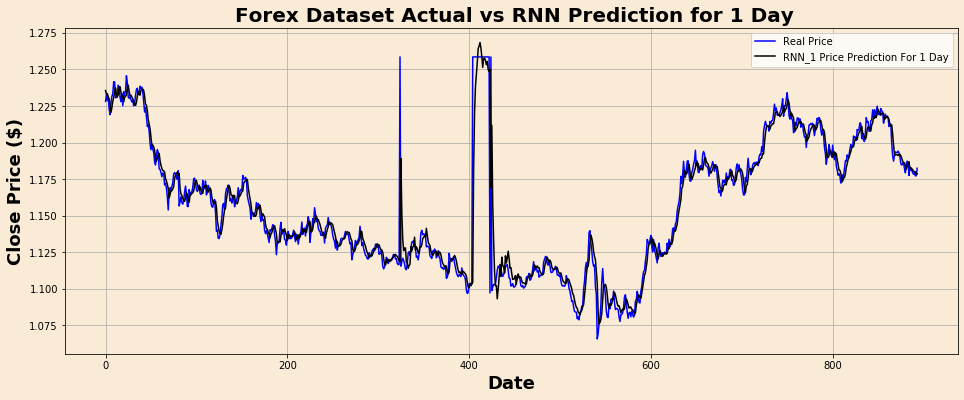

In [55]:
plt.figure(figsize = (16,6), facecolor = '#faebd7')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#faebd7')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'blue', label = 'Real Price')
plt.plot(RNN_1_Price_Prediction_1, color = 'black', label = 'RNN_1 Price Prediction For 1 Day')
plt.title(' Forex Dataset Actual vs RNN Prediction for 1 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [56]:
print ('R Squared =',r2_score(y_test_1, RNN_1_Price_Prediction_1))

R Squared = 0.9238111032147088


In [57]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, RNN_1_Price_Prediction_1)) 

Mean Absolute Error: 0.0055337632051164955


In [59]:
#def mean_absolute_percentage_error(y_test_1, RNN_1_Price_Prediction_1): 
    #y_test_1, RNN_1_Price_Prediction_1 = np.array(y_test_1), np.array(RNN_1_Price_Prediction_1)
    #return np.mean(np.abs((y_test_1 - RNN_1_Price_Prediction_1) / y_test_1)) * 100  
#print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, RNN_1_Price_Prediction_1))  

In [60]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, RNN_1_Price_Prediction_1))

Mean Squared Error: 0.00015220571706762008


In [61]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, RNN_1_Price_Prediction_1)))

Root Mean Squared Error: 0.01233716811377798


**Build LSTM Model**

In [62]:
#The LSTM Model Build
regressorLSTM_1 = Sequential()

regressorLSTM_1.add(LSTM(units=64, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorLSTM_1.add(Dropout(0.2))
regressorLSTM_1.add(LSTM(units=256))
regressorLSTM_1.add(Dropout(0.2))
regressorLSTM_1.add(Dense(units=1))
regressorLSTM_1.summary()

# Compiling the LSTM
regressorLSTM_1.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae', 'mse'])

# Fitting to the training set
history_1 = regressorLSTM_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 64)            16896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 345,857
Trainable params: 345,857
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3653/3653 [==============================] - ETA: 2:50 - loss: 0.2122 - mae: 0.4041 - mse: 0.212 - ETA

3653/3653 [==============================] - ETA: 15s - loss: 0.0026 - mae: 0.0328 - mse: 0.00 - ETA: 15s - loss: 0.0024 - mae: 0.0326 - mse: 0.00 - ETA: 15s - loss: 0.0020 - mae: 0.0301 - mse: 0.00 - ETA: 15s - loss: 0.0018 - mae: 0.0300 - mse: 0.00 - ETA: 14s - loss: 0.0016 - mae: 0.0287 - mse: 0.00 - ETA: 14s - loss: 0.0016 - mae: 0.0287 - mse: 0.00 - ETA: 14s - loss: 0.0024 - mae: 0.0302 - mse: 0.00 - ETA: 13s - loss: 0.0024 - mae: 0.0303 - mse: 0.00 - ETA: 13s - loss: 0.0023 - mae: 0.0303 - mse: 0.00 - ETA: 13s - loss: 0.0024 - mae: 0.0314 - mse: 0.00 - ETA: 13s - loss: 0.0024 - mae: 0.0317 - mse: 0.00 - ETA: 12s - loss: 0.0023 - mae: 0.0317 - mse: 0.00 - ETA: 12s - loss: 0.0023 - mae: 0.0314 - mse: 0.00 - ETA: 12s - loss: 0.0022 - mae: 0.0315 - mse: 0.00 - ETA: 11s - loss: 0.0022 - mae: 0.0321 - mse: 0.00 - ETA: 11s - loss: 0.0022 - mae: 0.0324 - mse: 0.00 - ETA: 11s - loss: 0.0022 - mae: 0.0320 - mse: 0.00 - ETA: 11s - loss: 0.0025 - mae: 0.0327 - mse: 0.00 - ETA: 10s - loss: 0.

3653/3653 [==============================] - ETA: 14s - loss: 0.0012 - mae: 0.0261 - mse: 0.00 - ETA: 14s - loss: 0.0022 - mae: 0.0308 - mse: 0.00 - ETA: 14s - loss: 0.0022 - mae: 0.0325 - mse: 0.00 - ETA: 14s - loss: 0.0021 - mae: 0.0328 - mse: 0.00 - ETA: 13s - loss: 0.0020 - mae: 0.0318 - mse: 0.00 - ETA: 13s - loss: 0.0019 - mae: 0.0316 - mse: 0.00 - ETA: 13s - loss: 0.0020 - mae: 0.0325 - mse: 0.00 - ETA: 12s - loss: 0.0020 - mae: 0.0325 - mse: 0.00 - ETA: 12s - loss: 0.0019 - mae: 0.0314 - mse: 0.00 - ETA: 12s - loss: 0.0019 - mae: 0.0311 - mse: 0.00 - ETA: 12s - loss: 0.0018 - mae: 0.0309 - mse: 0.00 - ETA: 11s - loss: 0.0018 - mae: 0.0307 - mse: 0.00 - ETA: 11s - loss: 0.0019 - mae: 0.0311 - mse: 0.00 - ETA: 11s - loss: 0.0019 - mae: 0.0310 - mse: 0.00 - ETA: 11s - loss: 0.0022 - mae: 0.0314 - mse: 0.00 - ETA: 10s - loss: 0.0022 - mae: 0.0313 - mse: 0.00 - ETA: 10s - loss: 0.0022 - mae: 0.0314 - mse: 0.00 - ETA: 10s - loss: 0.0021 - mae: 0.0311 - mse: 0.00 - ETA: 10s - loss: 0.

3653/3653 [==============================] - ETA: 14s - loss: 0.0018 - mae: 0.0305 - mse: 0.00 - ETA: 14s - loss: 0.0017 - mae: 0.0301 - mse: 0.00 - ETA: 14s - loss: 0.0027 - mae: 0.0345 - mse: 0.00 - ETA: 13s - loss: 0.0024 - mae: 0.0324 - mse: 0.00 - ETA: 13s - loss: 0.0020 - mae: 0.0302 - mse: 0.00 - ETA: 13s - loss: 0.0019 - mae: 0.0302 - mse: 0.00 - ETA: 13s - loss: 0.0018 - mae: 0.0300 - mse: 0.00 - ETA: 12s - loss: 0.0018 - mae: 0.0299 - mse: 0.00 - ETA: 12s - loss: 0.0017 - mae: 0.0294 - mse: 0.00 - ETA: 12s - loss: 0.0018 - mae: 0.0292 - mse: 0.00 - ETA: 12s - loss: 0.0017 - mae: 0.0284 - mse: 0.00 - ETA: 11s - loss: 0.0017 - mae: 0.0286 - mse: 0.00 - ETA: 11s - loss: 0.0017 - mae: 0.0286 - mse: 0.00 - ETA: 11s - loss: 0.0018 - mae: 0.0287 - mse: 0.00 - ETA: 11s - loss: 0.0018 - mae: 0.0286 - mse: 0.00 - ETA: 10s - loss: 0.0018 - mae: 0.0284 - mse: 0.00 - ETA: 10s - loss: 0.0017 - mae: 0.0283 - mse: 0.00 - ETA: 10s - loss: 0.0017 - mae: 0.0284 - mse: 0.00 - ETA: 10s - loss: 0.

3653/3653 [==============================] - ETA: 14s - loss: 0.0017 - mae: 0.0308 - mse: 0.00 - ETA: 14s - loss: 0.0014 - mae: 0.0278 - mse: 0.00 - ETA: 14s - loss: 0.0018 - mae: 0.0304 - mse: 0.00 - ETA: 13s - loss: 0.0017 - mae: 0.0295 - mse: 0.00 - ETA: 13s - loss: 0.0016 - mae: 0.0299 - mse: 0.00 - ETA: 13s - loss: 0.0016 - mae: 0.0303 - mse: 0.00 - ETA: 13s - loss: 0.0016 - mae: 0.0301 - mse: 0.00 - ETA: 12s - loss: 0.0028 - mae: 0.0318 - mse: 0.00 - ETA: 12s - loss: 0.0026 - mae: 0.0314 - mse: 0.00 - ETA: 12s - loss: 0.0025 - mae: 0.0310 - mse: 0.00 - ETA: 12s - loss: 0.0024 - mae: 0.0312 - mse: 0.00 - ETA: 11s - loss: 0.0024 - mae: 0.0313 - mse: 0.00 - ETA: 11s - loss: 0.0023 - mae: 0.0307 - mse: 0.00 - ETA: 11s - loss: 0.0024 - mae: 0.0311 - mse: 0.00 - ETA: 11s - loss: 0.0024 - mae: 0.0313 - mse: 0.00 - ETA: 10s - loss: 0.0025 - mae: 0.0318 - mse: 0.00 - ETA: 10s - loss: 0.0024 - mae: 0.0313 - mse: 0.00 - ETA: 10s - loss: 0.0023 - mae: 0.0311 - mse: 0.00 - ETA: 10s - loss: 0.

3653/3653 [==============================] - ETA: 14s - loss: 0.0011 - mae: 0.0269 - mse: 0.00 - ETA: 14s - loss: 0.0010 - mae: 0.0245 - mse: 0.00 - ETA: 13s - loss: 0.0026 - mae: 0.0273 - mse: 0.00 - ETA: 13s - loss: 0.0022 - mae: 0.0272 - mse: 0.00 - ETA: 13s - loss: 0.0022 - mae: 0.0283 - mse: 0.00 - ETA: 13s - loss: 0.0020 - mae: 0.0284 - mse: 0.00 - ETA: 13s - loss: 0.0018 - mae: 0.0271 - mse: 0.00 - ETA: 12s - loss: 0.0020 - mae: 0.0274 - mse: 0.00 - ETA: 12s - loss: 0.0019 - mae: 0.0277 - mse: 0.00 - ETA: 12s - loss: 0.0018 - mae: 0.0270 - mse: 0.00 - ETA: 12s - loss: 0.0018 - mae: 0.0269 - mse: 0.00 - ETA: 11s - loss: 0.0017 - mae: 0.0267 - mse: 0.00 - ETA: 11s - loss: 0.0017 - mae: 0.0262 - mse: 0.00 - ETA: 11s - loss: 0.0016 - mae: 0.0259 - mse: 0.00 - ETA: 11s - loss: 0.0019 - mae: 0.0265 - mse: 0.00 - ETA: 10s - loss: 0.0018 - mae: 0.0264 - mse: 0.00 - ETA: 10s - loss: 0.0019 - mae: 0.0267 - mse: 0.00 - ETA: 10s - loss: 0.0019 - mae: 0.0268 - mse: 0.00 - ETA: 9s - loss: 0.0

3653/3653 [==============================] - ETA: 13s - loss: 8.4048e-04 - mae: 0.0225 - mse: 8.4048e- - ETA: 14s - loss: 9.2776e-04 - mae: 0.0236 - mse: 9.2776e- - ETA: 14s - loss: 8.1919e-04 - mae: 0.0221 - mse: 8.1919e- - ETA: 13s - loss: 8.9414e-04 - mae: 0.0227 - mse: 8.9414e- - ETA: 13s - loss: 8.9805e-04 - mae: 0.0229 - mse: 8.9805e- - ETA: 13s - loss: 0.0019 - mae: 0.0251 - mse: 0.0019       - ETA: 12s - loss: 0.0017 - mae: 0.0242 - mse: 0.00 - ETA: 12s - loss: 0.0016 - mae: 0.0244 - mse: 0.00 - ETA: 12s - loss: 0.0016 - mae: 0.0242 - mse: 0.00 - ETA: 12s - loss: 0.0015 - mae: 0.0246 - mse: 0.00 - ETA: 12s - loss: 0.0015 - mae: 0.0243 - mse: 0.00 - ETA: 11s - loss: 0.0017 - mae: 0.0253 - mse: 0.00 - ETA: 11s - loss: 0.0016 - mae: 0.0252 - mse: 0.00 - ETA: 11s - loss: 0.0016 - mae: 0.0252 - mse: 0.00 - ETA: 10s - loss: 0.0016 - mae: 0.0252 - mse: 0.00 - ETA: 10s - loss: 0.0015 - mae: 0.0249 - mse: 0.00 - ETA: 10s - loss: 0.0015 - mae: 0.0245 - mse: 0.00 - ETA: 10s - loss: 0.0014

3653/3653 [==============================] - ETA: 14s - loss: 0.0094 - mae: 0.0533 - mse: 0.00 - ETA: 14s - loss: 0.0052 - mae: 0.0381 - mse: 0.00 - ETA: 14s - loss: 0.0044 - mae: 0.0337 - mse: 0.00 - ETA: 14s - loss: 0.0038 - mae: 0.0337 - mse: 0.00 - ETA: 13s - loss: 0.0043 - mae: 0.0356 - mse: 0.00 - ETA: 13s - loss: 0.0041 - mae: 0.0357 - mse: 0.00 - ETA: 13s - loss: 0.0038 - mae: 0.0355 - mse: 0.00 - ETA: 12s - loss: 0.0034 - mae: 0.0336 - mse: 0.00 - ETA: 12s - loss: 0.0032 - mae: 0.0333 - mse: 0.00 - ETA: 12s - loss: 0.0031 - mae: 0.0332 - mse: 0.00 - ETA: 12s - loss: 0.0030 - mae: 0.0339 - mse: 0.00 - ETA: 11s - loss: 0.0029 - mae: 0.0334 - mse: 0.00 - ETA: 11s - loss: 0.0031 - mae: 0.0336 - mse: 0.00 - ETA: 11s - loss: 0.0030 - mae: 0.0329 - mse: 0.00 - ETA: 11s - loss: 0.0029 - mae: 0.0327 - mse: 0.00 - ETA: 10s - loss: 0.0028 - mae: 0.0325 - mse: 0.00 - ETA: 10s - loss: 0.0027 - mae: 0.0317 - mse: 0.00 - ETA: 10s - loss: 0.0026 - mae: 0.0315 - mse: 0.00 - ETA: 10s - loss: 0.

3653/3653 [==============================] - ETA: 14s - loss: 9.5061e-04 - mae: 0.0203 - mse: 9.5061e- - ETA: 14s - loss: 9.6934e-04 - mae: 0.0222 - mse: 9.6934e- - ETA: 14s - loss: 0.0025 - mae: 0.0280 - mse: 0.0025       - ETA: 14s - loss: 0.0022 - mae: 0.0278 - mse: 0.00 - ETA: 13s - loss: 0.0020 - mae: 0.0269 - mse: 0.00 - ETA: 13s - loss: 0.0018 - mae: 0.0259 - mse: 0.00 - ETA: 13s - loss: 0.0018 - mae: 0.0265 - mse: 0.00 - ETA: 12s - loss: 0.0018 - mae: 0.0268 - mse: 0.00 - ETA: 12s - loss: 0.0019 - mae: 0.0267 - mse: 0.00 - ETA: 12s - loss: 0.0018 - mae: 0.0265 - mse: 0.00 - ETA: 12s - loss: 0.0018 - mae: 0.0267 - mse: 0.00 - ETA: 11s - loss: 0.0017 - mae: 0.0261 - mse: 0.00 - ETA: 11s - loss: 0.0016 - mae: 0.0257 - mse: 0.00 - ETA: 11s - loss: 0.0015 - mae: 0.0253 - mse: 0.00 - ETA: 11s - loss: 0.0015 - mae: 0.0252 - mse: 0.00 - ETA: 10s - loss: 0.0015 - mae: 0.0247 - mse: 0.00 - ETA: 10s - loss: 0.0014 - mae: 0.0246 - mse: 0.00 - ETA: 10s - loss: 0.0014 - mae: 0.0243 - mse: 0.

3653/3653 [==============================] - ETA: 14s - loss: 0.0069 - mae: 0.0290 - mse: 0.00 - ETA: 14s - loss: 0.0038 - mae: 0.0245 - mse: 0.00 - ETA: 14s - loss: 0.0030 - mae: 0.0250 - mse: 0.00 - ETA: 14s - loss: 0.0025 - mae: 0.0246 - mse: 0.00 - ETA: 13s - loss: 0.0022 - mae: 0.0245 - mse: 0.00 - ETA: 13s - loss: 0.0020 - mae: 0.0236 - mse: 0.00 - ETA: 13s - loss: 0.0018 - mae: 0.0235 - mse: 0.00 - ETA: 12s - loss: 0.0017 - mae: 0.0235 - mse: 0.00 - ETA: 12s - loss: 0.0016 - mae: 0.0231 - mse: 0.00 - ETA: 12s - loss: 0.0018 - mae: 0.0237 - mse: 0.00 - ETA: 12s - loss: 0.0017 - mae: 0.0234 - mse: 0.00 - ETA: 11s - loss: 0.0016 - mae: 0.0232 - mse: 0.00 - ETA: 11s - loss: 0.0016 - mae: 0.0234 - mse: 0.00 - ETA: 11s - loss: 0.0016 - mae: 0.0235 - mse: 0.00 - ETA: 11s - loss: 0.0016 - mae: 0.0234 - mse: 0.00 - ETA: 10s - loss: 0.0015 - mae: 0.0235 - mse: 0.00 - ETA: 10s - loss: 0.0015 - mae: 0.0236 - mse: 0.00 - ETA: 10s - loss: 0.0016 - mae: 0.0240 - mse: 0.00 - ETA: 10s - loss: 0.

3653/3653 [==============================] - ETA: 14s - loss: 9.1693e-04 - mae: 0.0252 - mse: 9.1693e- - ETA: 14s - loss: 8.2048e-04 - mae: 0.0220 - mse: 8.2048e- - ETA: 14s - loss: 9.6661e-04 - mae: 0.0215 - mse: 9.6661e- - ETA: 14s - loss: 9.8719e-04 - mae: 0.0226 - mse: 9.8719e- - ETA: 14s - loss: 9.4215e-04 - mae: 0.0222 - mse: 9.4215e- - ETA: 13s - loss: 9.9922e-04 - mae: 0.0228 - mse: 9.9922e- - ETA: 13s - loss: 9.4170e-04 - mae: 0.0221 - mse: 9.4170e- - ETA: 13s - loss: 8.9319e-04 - mae: 0.0217 - mse: 8.9319e- - ETA: 12s - loss: 8.8811e-04 - mae: 0.0217 - mse: 8.8811e- - ETA: 12s - loss: 9.0903e-04 - mae: 0.0216 - mse: 9.0903e- - ETA: 12s - loss: 0.0014 - mae: 0.0223 - mse: 0.0014       - ETA: 12s - loss: 0.0013 - mae: 0.0220 - mse: 0.00 - ETA: 11s - loss: 0.0013 - mae: 0.0221 - mse: 0.00 - ETA: 11s - loss: 0.0013 - mae: 0.0220 - mse: 0.00 - ETA: 11s - loss: 0.0012 - mae: 0.0217 - mse: 0.00 - ETA: 10s - loss: 0.0013 - mae: 0.0223 - mse: 0.00 - ETA: 10s - loss: 0.0013 - mae: 0.02

3653/3653 [==============================] - ETA: 13s - loss: 0.0011 - mae: 0.0211 - mse: 0.00 - ETA: 13s - loss: 8.1904e-04 - mae: 0.0200 - mse: 8.1904e- - ETA: 13s - loss: 0.0019 - mae: 0.0225 - mse: 0.0019       - ETA: 13s - loss: 0.0016 - mae: 0.0222 - mse: 0.00 - ETA: 13s - loss: 0.0016 - mae: 0.0227 - mse: 0.00 - ETA: 13s - loss: 0.0017 - mae: 0.0236 - mse: 0.00 - ETA: 12s - loss: 0.0015 - mae: 0.0230 - mse: 0.00 - ETA: 12s - loss: 0.0016 - mae: 0.0236 - mse: 0.00 - ETA: 12s - loss: 0.0015 - mae: 0.0231 - mse: 0.00 - ETA: 12s - loss: 0.0015 - mae: 0.0231 - mse: 0.00 - ETA: 12s - loss: 0.0015 - mae: 0.0230 - mse: 0.00 - ETA: 11s - loss: 0.0014 - mae: 0.0228 - mse: 0.00 - ETA: 11s - loss: 0.0013 - mae: 0.0224 - mse: 0.00 - ETA: 11s - loss: 0.0013 - mae: 0.0221 - mse: 0.00 - ETA: 10s - loss: 0.0012 - mae: 0.0222 - mse: 0.00 - ETA: 10s - loss: 0.0013 - mae: 0.0223 - mse: 0.00 - ETA: 10s - loss: 0.0015 - mae: 0.0229 - mse: 0.00 - ETA: 10s - loss: 0.0015 - mae: 0.0228 - mse: 0.00 - ETA

3653/3653 [==============================] - ETA: 14s - loss: 0.0016 - mae: 0.0226 - mse: 0.00 - ETA: 14s - loss: 0.0013 - mae: 0.0234 - mse: 0.00 - ETA: 14s - loss: 0.0011 - mae: 0.0227 - mse: 0.00 - ETA: 13s - loss: 0.0024 - mae: 0.0246 - mse: 0.00 - ETA: 13s - loss: 0.0021 - mae: 0.0236 - mse: 0.00 - ETA: 13s - loss: 0.0018 - mae: 0.0225 - mse: 0.00 - ETA: 13s - loss: 0.0017 - mae: 0.0219 - mse: 0.00 - ETA: 12s - loss: 0.0016 - mae: 0.0219 - mse: 0.00 - ETA: 12s - loss: 0.0015 - mae: 0.0219 - mse: 0.00 - ETA: 12s - loss: 0.0015 - mae: 0.0222 - mse: 0.00 - ETA: 12s - loss: 0.0014 - mae: 0.0218 - mse: 0.00 - ETA: 11s - loss: 0.0014 - mae: 0.0215 - mse: 0.00 - ETA: 11s - loss: 0.0013 - mae: 0.0213 - mse: 0.00 - ETA: 11s - loss: 0.0013 - mae: 0.0211 - mse: 0.00 - ETA: 10s - loss: 0.0012 - mae: 0.0210 - mse: 0.00 - ETA: 10s - loss: 0.0012 - mae: 0.0207 - mse: 0.00 - ETA: 10s - loss: 0.0012 - mae: 0.0212 - mse: 0.00 - ETA: 10s - loss: 0.0012 - mae: 0.0212 - mse: 0.00 - ETA: 9s - loss: 0.0

3653/3653 [==============================] - ETA: 14s - loss: 0.0015 - mae: 0.0237 - mse: 0.00 - ETA: 14s - loss: 0.0011 - mae: 0.0214 - mse: 0.00 - ETA: 14s - loss: 9.3482e-04 - mae: 0.0203 - mse: 9.3482e- - ETA: 13s - loss: 0.0012 - mae: 0.0209 - mse: 0.0012       - ETA: 13s - loss: 0.0016 - mae: 0.0216 - mse: 0.00 - ETA: 13s - loss: 0.0015 - mae: 0.0214 - mse: 0.00 - ETA: 13s - loss: 0.0015 - mae: 0.0220 - mse: 0.00 - ETA: 12s - loss: 0.0014 - mae: 0.0213 - mse: 0.00 - ETA: 12s - loss: 0.0013 - mae: 0.0208 - mse: 0.00 - ETA: 12s - loss: 0.0012 - mae: 0.0203 - mse: 0.00 - ETA: 12s - loss: 0.0012 - mae: 0.0203 - mse: 0.00 - ETA: 11s - loss: 0.0012 - mae: 0.0203 - mse: 0.00 - ETA: 11s - loss: 0.0015 - mae: 0.0205 - mse: 0.00 - ETA: 11s - loss: 0.0015 - mae: 0.0205 - mse: 0.00 - ETA: 11s - loss: 0.0014 - mae: 0.0204 - mse: 0.00 - ETA: 10s - loss: 0.0014 - mae: 0.0203 - mse: 0.00 - ETA: 10s - loss: 0.0014 - mae: 0.0204 - mse: 0.00 - ETA: 10s - loss: 0.0013 - mae: 0.0204 - mse: 0.00 - ETA

3653/3653 [==============================] - ETA: 13s - loss: 4.5945e-04 - mae: 0.0179 - mse: 4.5945e- - ETA: 14s - loss: 6.0363e-04 - mae: 0.0202 - mse: 6.0363e- - ETA: 13s - loss: 8.8103e-04 - mae: 0.0219 - mse: 8.8103e- - ETA: 13s - loss: 9.6996e-04 - mae: 0.0235 - mse: 9.6996e- - ETA: 13s - loss: 0.0015 - mae: 0.0244 - mse: 0.0015       - ETA: 13s - loss: 0.0013 - mae: 0.0233 - mse: 0.00 - ETA: 13s - loss: 0.0013 - mae: 0.0235 - mse: 0.00 - ETA: 12s - loss: 0.0012 - mae: 0.0232 - mse: 0.00 - ETA: 12s - loss: 0.0012 - mae: 0.0229 - mse: 0.00 - ETA: 12s - loss: 0.0021 - mae: 0.0244 - mse: 0.00 - ETA: 11s - loss: 0.0020 - mae: 0.0244 - mse: 0.00 - ETA: 11s - loss: 0.0020 - mae: 0.0247 - mse: 0.00 - ETA: 11s - loss: 0.0019 - mae: 0.0249 - mse: 0.00 - ETA: 11s - loss: 0.0019 - mae: 0.0247 - mse: 0.00 - ETA: 10s - loss: 0.0021 - mae: 0.0247 - mse: 0.00 - ETA: 10s - loss: 0.0020 - mae: 0.0244 - mse: 0.00 - ETA: 10s - loss: 0.0019 - mae: 0.0245 - mse: 0.00 - ETA: 10s - loss: 0.0019 - mae: 

3653/3653 [==============================] - ETA: 13s - loss: 6.8030e-04 - mae: 0.0208 - mse: 6.8030e- - ETA: 14s - loss: 7.6500e-04 - mae: 0.0218 - mse: 7.6500e- - ETA: 14s - loss: 6.6547e-04 - mae: 0.0200 - mse: 6.6547e- - ETA: 13s - loss: 6.6042e-04 - mae: 0.0193 - mse: 6.6042e- - ETA: 13s - loss: 7.3799e-04 - mae: 0.0198 - mse: 7.3799e- - ETA: 13s - loss: 7.1920e-04 - mae: 0.0197 - mse: 7.1920e- - ETA: 13s - loss: 7.1723e-04 - mae: 0.0197 - mse: 7.1723e- - ETA: 12s - loss: 7.8886e-04 - mae: 0.0206 - mse: 7.8886e- - ETA: 12s - loss: 7.5825e-04 - mae: 0.0203 - mse: 7.5825e- - ETA: 12s - loss: 7.5383e-04 - mae: 0.0202 - mse: 7.5383e- - ETA: 12s - loss: 7.8752e-04 - mae: 0.0204 - mse: 7.8752e- - ETA: 11s - loss: 7.7313e-04 - mae: 0.0203 - mse: 7.7313e- - ETA: 11s - loss: 8.2219e-04 - mae: 0.0205 - mse: 8.2219e- - ETA: 11s - loss: 8.2742e-04 - mae: 0.0205 - mse: 8.2742e- - ETA: 11s - loss: 8.4164e-04 - mae: 0.0204 - mse: 8.4164e- - ETA: 10s - loss: 8.4080e-04 - mae: 0.0205 - mse: 8.4080

3653/3653 [==============================] - ETA: 13s - loss: 7.6967e-04 - mae: 0.0210 - mse: 7.6967e- - ETA: 13s - loss: 7.7982e-04 - mae: 0.0203 - mse: 7.7982e- - ETA: 14s - loss: 0.0014 - mae: 0.0218 - mse: 0.0014       - ETA: 13s - loss: 0.0012 - mae: 0.0215 - mse: 0.00 - ETA: 13s - loss: 0.0011 - mae: 0.0214 - mse: 0.00 - ETA: 13s - loss: 0.0010 - mae: 0.0211 - mse: 0.00 - ETA: 13s - loss: 9.6855e-04 - mae: 0.0206 - mse: 9.6855e- - ETA: 12s - loss: 0.0010 - mae: 0.0210 - mse: 0.0010       - ETA: 12s - loss: 9.9188e-04 - mae: 0.0209 - mse: 9.9188e- - ETA: 12s - loss: 0.0010 - mae: 0.0211 - mse: 0.0010       - ETA: 12s - loss: 9.7735e-04 - mae: 0.0208 - mse: 9.7735e- - ETA: 11s - loss: 0.0014 - mae: 0.0215 - mse: 0.0014       - ETA: 11s - loss: 0.0013 - mae: 0.0212 - mse: 0.00 - ETA: 11s - loss: 0.0013 - mae: 0.0209 - mse: 0.00 - ETA: 11s - loss: 0.0012 - mae: 0.0209 - mse: 0.00 - ETA: 10s - loss: 0.0012 - mae: 0.0209 - mse: 0.00 - ETA: 10s - loss: 0.0011 - mae: 0.0206 - mse: 0.00 -

3653/3653 [==============================] - ETA: 13s - loss: 3.7039e-04 - mae: 0.0141 - mse: 3.7039e- - ETA: 14s - loss: 4.3915e-04 - mae: 0.0158 - mse: 4.3915e- - ETA: 13s - loss: 5.9310e-04 - mae: 0.0186 - mse: 5.9310e- - ETA: 13s - loss: 8.1167e-04 - mae: 0.0197 - mse: 8.1167e- - ETA: 13s - loss: 7.7595e-04 - mae: 0.0194 - mse: 7.7595e- - ETA: 13s - loss: 7.3874e-04 - mae: 0.0190 - mse: 7.3874e- - ETA: 13s - loss: 0.0010 - mae: 0.0198 - mse: 0.0010       - ETA: 12s - loss: 9.7778e-04 - mae: 0.0198 - mse: 9.7778e- - ETA: 12s - loss: 9.6334e-04 - mae: 0.0200 - mse: 9.6334e- - ETA: 12s - loss: 0.0010 - mae: 0.0206 - mse: 0.0010       - ETA: 12s - loss: 9.6709e-04 - mae: 0.0203 - mse: 9.6709e- - ETA: 12s - loss: 9.4155e-04 - mae: 0.0201 - mse: 9.4155e- - ETA: 11s - loss: 0.0011 - mae: 0.0207 - mse: 0.0011       - ETA: 11s - loss: 0.0011 - mae: 0.0204 - mse: 0.00 - ETA: 11s - loss: 0.0011 - mae: 0.0202 - mse: 0.00 - ETA: 10s - loss: 0.0010 - mae: 0.0202 - mse: 0.00 - ETA: 10s - loss: 0.

3653/3653 [==============================] - ETA: 14s - loss: 4.4394e-04 - mae: 0.0162 - mse: 4.4394e- - ETA: 14s - loss: 6.3120e-04 - mae: 0.0188 - mse: 6.3120e- - ETA: 14s - loss: 7.8545e-04 - mae: 0.0210 - mse: 7.8545e- - ETA: 13s - loss: 9.5726e-04 - mae: 0.0224 - mse: 9.5726e- - ETA: 13s - loss: 9.3965e-04 - mae: 0.0221 - mse: 9.3965e- - ETA: 13s - loss: 9.1335e-04 - mae: 0.0216 - mse: 9.1335e- - ETA: 13s - loss: 9.6092e-04 - mae: 0.0217 - mse: 9.6092e- - ETA: 12s - loss: 9.6054e-04 - mae: 0.0222 - mse: 9.6054e- - ETA: 12s - loss: 9.5285e-04 - mae: 0.0225 - mse: 9.5285e- - ETA: 12s - loss: 0.0010 - mae: 0.0230 - mse: 0.0010       - ETA: 11s - loss: 9.6533e-04 - mae: 0.0225 - mse: 9.6533e- - ETA: 11s - loss: 0.0013 - mae: 0.0229 - mse: 0.0013       - ETA: 11s - loss: 0.0012 - mae: 0.0226 - mse: 0.00 - ETA: 11s - loss: 0.0013 - mae: 0.0232 - mse: 0.00 - ETA: 10s - loss: 0.0014 - mae: 0.0237 - mse: 0.00 - ETA: 10s - loss: 0.0014 - mae: 0.0237 - mse: 0.00 - ETA: 10s - loss: 0.0014 - m

3653/3653 [==============================] - ETA: 14s - loss: 5.3106e-04 - mae: 0.0187 - mse: 5.3106e- - ETA: 14s - loss: 5.1797e-04 - mae: 0.0170 - mse: 5.1797e- - ETA: 14s - loss: 0.0023 - mae: 0.0211 - mse: 0.0023       - ETA: 13s - loss: 0.0018 - mae: 0.0201 - mse: 0.00 - ETA: 13s - loss: 0.0018 - mae: 0.0210 - mse: 0.00 - ETA: 13s - loss: 0.0023 - mae: 0.0215 - mse: 0.00 - ETA: 13s - loss: 0.0022 - mae: 0.0218 - mse: 0.00 - ETA: 13s - loss: 0.0020 - mae: 0.0215 - mse: 0.00 - ETA: 12s - loss: 0.0019 - mae: 0.0210 - mse: 0.00 - ETA: 12s - loss: 0.0018 - mae: 0.0208 - mse: 0.00 - ETA: 12s - loss: 0.0017 - mae: 0.0208 - mse: 0.00 - ETA: 11s - loss: 0.0016 - mae: 0.0208 - mse: 0.00 - ETA: 11s - loss: 0.0015 - mae: 0.0205 - mse: 0.00 - ETA: 11s - loss: 0.0015 - mae: 0.0202 - mse: 0.00 - ETA: 11s - loss: 0.0014 - mae: 0.0203 - mse: 0.00 - ETA: 10s - loss: 0.0014 - mae: 0.0203 - mse: 0.00 - ETA: 10s - loss: 0.0013 - mae: 0.0201 - mse: 0.00 - ETA: 10s - loss: 0.0013 - mae: 0.0201 - mse: 0.

3653/3653 [==============================] - ETA: 13s - loss: 4.2216e-04 - mae: 0.0159 - mse: 4.2216e- - ETA: 14s - loss: 9.5109e-04 - mae: 0.0212 - mse: 9.5109e- - ETA: 13s - loss: 7.6899e-04 - mae: 0.0193 - mse: 7.6899e- - ETA: 13s - loss: 0.0010 - mae: 0.0204 - mse: 0.0010       - ETA: 13s - loss: 0.0014 - mae: 0.0215 - mse: 0.00 - ETA: 13s - loss: 0.0013 - mae: 0.0212 - mse: 0.00 - ETA: 13s - loss: 0.0012 - mae: 0.0208 - mse: 0.00 - ETA: 12s - loss: 0.0012 - mae: 0.0209 - mse: 0.00 - ETA: 12s - loss: 0.0011 - mae: 0.0204 - mse: 0.00 - ETA: 12s - loss: 0.0010 - mae: 0.0200 - mse: 0.00 - ETA: 12s - loss: 0.0010 - mae: 0.0201 - mse: 0.00 - ETA: 11s - loss: 9.8739e-04 - mae: 0.0199 - mse: 9.8739e- - ETA: 11s - loss: 9.7017e-04 - mae: 0.0196 - mse: 9.7017e- - ETA: 11s - loss: 9.3481e-04 - mae: 0.0194 - mse: 9.3481e- - ETA: 11s - loss: 9.5512e-04 - mae: 0.0196 - mse: 9.5512e- - ETA: 10s - loss: 9.9903e-04 - mae: 0.0198 - mse: 9.9903e- - ETA: 10s - loss: 0.0012 - mae: 0.0205 - mse: 0.0012

3653/3653 [==============================] - ETA: 13s - loss: 0.0012 - mae: 0.0214 - mse: 0.00 - ETA: 14s - loss: 0.0010 - mae: 0.0213 - mse: 0.00 - ETA: 13s - loss: 8.5238e-04 - mae: 0.0204 - mse: 8.5238e- - ETA: 13s - loss: 0.0022 - mae: 0.0225 - mse: 0.0022       - ETA: 13s - loss: 0.0019 - mae: 0.0219 - mse: 0.00 - ETA: 13s - loss: 0.0017 - mae: 0.0217 - mse: 0.00 - ETA: 13s - loss: 0.0017 - mae: 0.0211 - mse: 0.00 - ETA: 12s - loss: 0.0018 - mae: 0.0214 - mse: 0.00 - ETA: 12s - loss: 0.0026 - mae: 0.0230 - mse: 0.00 - ETA: 12s - loss: 0.0025 - mae: 0.0228 - mse: 0.00 - ETA: 12s - loss: 0.0027 - mae: 0.0230 - mse: 0.00 - ETA: 11s - loss: 0.0025 - mae: 0.0228 - mse: 0.00 - ETA: 11s - loss: 0.0024 - mae: 0.0228 - mse: 0.00 - ETA: 11s - loss: 0.0023 - mae: 0.0226 - mse: 0.00 - ETA: 11s - loss: 0.0022 - mae: 0.0228 - mse: 0.00 - ETA: 10s - loss: 0.0024 - mae: 0.0230 - mse: 0.00 - ETA: 10s - loss: 0.0023 - mae: 0.0229 - mse: 0.00 - ETA: 10s - loss: 0.0023 - mae: 0.0230 - mse: 0.00 - ETA

3653/3653 [==============================] - ETA: 14s - loss: 0.0017 - mae: 0.0233 - mse: 0.00 - ETA: 14s - loss: 0.0013 - mae: 0.0231 - mse: 0.00 - ETA: 14s - loss: 0.0011 - mae: 0.0210 - mse: 0.00 - ETA: 13s - loss: 0.0010 - mae: 0.0205 - mse: 0.00 - ETA: 13s - loss: 9.6369e-04 - mae: 0.0199 - mse: 9.6369e- - ETA: 13s - loss: 9.0813e-04 - mae: 0.0197 - mse: 9.0813e- - ETA: 13s - loss: 8.6761e-04 - mae: 0.0196 - mse: 8.6761e- - ETA: 12s - loss: 8.2729e-04 - mae: 0.0194 - mse: 8.2729e- - ETA: 12s - loss: 7.7413e-04 - mae: 0.0189 - mse: 7.7413e- - ETA: 12s - loss: 7.2910e-04 - mae: 0.0184 - mse: 7.2910e- - ETA: 12s - loss: 9.0462e-04 - mae: 0.0192 - mse: 9.0462e- - ETA: 11s - loss: 8.6166e-04 - mae: 0.0189 - mse: 8.6166e- - ETA: 11s - loss: 8.4307e-04 - mae: 0.0188 - mse: 8.4307e- - ETA: 11s - loss: 8.2352e-04 - mae: 0.0187 - mse: 8.2352e- - ETA: 11s - loss: 8.2748e-04 - mae: 0.0189 - mse: 8.2748e- - ETA: 10s - loss: 8.5036e-04 - mae: 0.0190 - mse: 8.5036e- - ETA: 10s - loss: 8.2856e-04

3653/3653 [==============================] - ETA: 14s - loss: 6.1413e-04 - mae: 0.0196 - mse: 6.1413e- - ETA: 14s - loss: 6.6038e-04 - mae: 0.0194 - mse: 6.6038e- - ETA: 14s - loss: 0.0022 - mae: 0.0223 - mse: 0.0022       - ETA: 13s - loss: 0.0019 - mae: 0.0214 - mse: 0.00 - ETA: 13s - loss: 0.0017 - mae: 0.0209 - mse: 0.00 - ETA: 13s - loss: 0.0023 - mae: 0.0222 - mse: 0.00 - ETA: 13s - loss: 0.0021 - mae: 0.0211 - mse: 0.00 - ETA: 12s - loss: 0.0020 - mae: 0.0213 - mse: 0.00 - ETA: 12s - loss: 0.0019 - mae: 0.0214 - mse: 0.00 - ETA: 12s - loss: 0.0017 - mae: 0.0209 - mse: 0.00 - ETA: 12s - loss: 0.0016 - mae: 0.0205 - mse: 0.00 - ETA: 11s - loss: 0.0016 - mae: 0.0207 - mse: 0.00 - ETA: 11s - loss: 0.0015 - mae: 0.0206 - mse: 0.00 - ETA: 11s - loss: 0.0015 - mae: 0.0211 - mse: 0.00 - ETA: 11s - loss: 0.0015 - mae: 0.0212 - mse: 0.00 - ETA: 10s - loss: 0.0014 - mae: 0.0209 - mse: 0.00 - ETA: 10s - loss: 0.0015 - mae: 0.0213 - mse: 0.00 - ETA: 10s - loss: 0.0015 - mae: 0.0212 - mse: 0.

3653/3653 [==============================] - ETA: 13s - loss: 0.0029 - mae: 0.0433 - mse: 0.00 - ETA: 14s - loss: 0.0044 - mae: 0.0543 - mse: 0.00 - ETA: 13s - loss: 0.0053 - mae: 0.0592 - mse: 0.00 - ETA: 13s - loss: 0.0061 - mae: 0.0618 - mse: 0.00 - ETA: 13s - loss: 0.0059 - mae: 0.0603 - mse: 0.00 - ETA: 13s - loss: 0.0052 - mae: 0.0562 - mse: 0.00 - ETA: 13s - loss: 0.0050 - mae: 0.0551 - mse: 0.00 - ETA: 12s - loss: 0.0051 - mae: 0.0574 - mse: 0.00 - ETA: 12s - loss: 0.0049 - mae: 0.0564 - mse: 0.00 - ETA: 12s - loss: 0.0045 - mae: 0.0537 - mse: 0.00 - ETA: 11s - loss: 0.0043 - mae: 0.0515 - mse: 0.00 - ETA: 11s - loss: 0.0042 - mae: 0.0510 - mse: 0.00 - ETA: 11s - loss: 0.0041 - mae: 0.0501 - mse: 0.00 - ETA: 11s - loss: 0.0040 - mae: 0.0499 - mse: 0.00 - ETA: 10s - loss: 0.0039 - mae: 0.0487 - mse: 0.00 - ETA: 10s - loss: 0.0038 - mae: 0.0474 - mse: 0.00 - ETA: 10s - loss: 0.0037 - mae: 0.0469 - mse: 0.00 - ETA: 10s - loss: 0.0036 - mae: 0.0470 - mse: 0.00 - ETA: 9s - loss: 0.0

In [63]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date               
2018-01-11  1.19561
2018-01-12  1.20421
2018-01-15  1.21923
2018-01-16  1.22684
2018-01-17  1.22713
...             ...
2021-07-21  1.17841
2021-07-22  1.17927
2021-07-23  1.17727
2021-07-26  1.17734
2021-07-27  1.18245

[924 rows x 1 columns]

In [64]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[1.228184],
       [1.232666],
       [1.228713],
       [1.231557],
       [1.223032],
       [1.219126],
       [1.227084],
       [1.231542],
       [1.233654],
       [1.241665],
       [1.241465],
       [1.2306629999999998],
       [1.230875],
       [1.2339579999999999],
       [1.239234],
       [1.237562],
       [1.230921],
       [1.2280790000000001],
       [1.2336850000000001],
       [1.22519],
       [1.234766],
       [1.232499],
       [1.2354370000000001],
       [1.245749],
       [1.240787],
       [1.231027],
       [1.230285],
       [1.2314209999999999],
       [1.229271],
       [1.227853],
       [1.228682],
       [1.22516],
       [1.227144],
       [1.23224],
       [1.236308],
       [1.237164],
       [1.2329700000000001],
       [1.233259],
       [1.238513],
       [1.237317],
       [1.2379149999999999],
       [1.234553],
       [1.2273399999999999],
       [1.220897],
       [1.22414],
       [1.217167],
       [1.210962],
       [1.212283],
  

In [65]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.2797083 ],
       [0.29506513],
       [0.32189849],
       [0.33549918],
       [0.33601012],
       [0.32041211],
       [0.32981451],
       [0.33318922],
       [0.33332321],
       [0.34297393],
       [0.35741607],
       [0.35763581],
       [0.364019  ],
       [0.35563492],
       [0.36071396],
       [0.3623379 ],
       [0.37865765],
       [0.36739014],
       [0.35325529],
       [0.35566171],
       [0.33544558],
       [0.33412893],
       [0.33270686],
       [0.34181091],
       [0.35074346],
       [0.37102212],
       [0.3775125 ],
       [0.36112664],
       [0.35876131],
       [0.34744913],
       [0.33789489],
       [0.34590202],
       [0.33883995],
       [0.34392078],
       [0.32869079],
       [0.32171269],
       [0.33592973],
       [0.34389398],
       [0.34766709],
       [0.36197881],
       [0.36162151],
       [0.34232364],
       [0.34270238],
       [0.34821019],
       [0.35763581],
       [0.35464876],
       [0.34278456],
       [0.337

In [66]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape

(894, 30)

In [67]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape

(894, 30, 1)

In [68]:
LSTM_1_Price_Prediction_1 = regressorLSTM_1.predict(X_test_1)
LSTM_1_Price_Prediction_1 = sc.inverse_transform(LSTM_1_Price_Prediction_1)

<function matplotlib.pyplot.show(*args, **kw)>

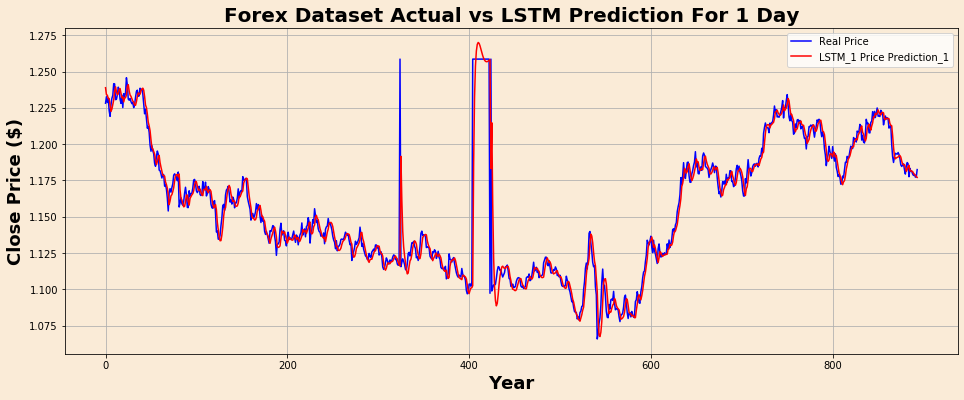

In [69]:
plt.figure(figsize = (16,6), facecolor = '#faebd7')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#faebd7')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'blue', label = 'Real Price')
plt.plot(LSTM_1_Price_Prediction_1, color = 'red', label = 'LSTM_1 Price Prediction_1')
plt.title('Forex Dataset Actual vs LSTM Prediction For 1 Day',fontweight = "bold",fontsize = 20)
plt.xlabel('Year', fontsize = 18,fontweight = "bold")
plt.ylabel('Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [70]:
print ('R Squared =',r2_score(y_test_1, LSTM_1_Price_Prediction_1))

R Squared = 0.9229248551508853


In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, LSTM_1_Price_Prediction_1)) 

Mean Absolute Error: 0.005479072563316466


In [72]:
#def mean_absolute_percentage_error(y_test_1, LSTM_1_Price_Prediction_1): 
    #y_test_1, LSTM_1_Price_Prediction_1 = np.array(y_test_1), np.array(LSTM_1_Price_Prediction_1)
    #return np.mean(np.abs((y_test_1 - LSTM_1_Price_Prediction_1) / y_test_1)) * 100
#print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, LSTM_1_Price_Prediction_1)) 

In [73]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, LSTM_1_Price_Prediction_1))

Mean Squared Error: 0.00015397621155888681


In [74]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, LSTM_1_Price_Prediction_1)))

Root Mean Squared Error: 0.012408715145368066


**Build GRU Model**

In [75]:
#The GRU Model Build
regressorGRU_1 = Sequential()

regressorGRU_1.add(GRU(units=256, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorGRU_1.add(Dropout(0.2))
regressorGRU_1.add(GRU(units=64))
regressorGRU_1.add(Dropout(0.2))
regressorGRU_1.add(Dense(units=1))
regressorGRU_1.summary()

# Compiling the GRU
regressorGRU_1.compile(optimizer='adam',loss='mean_squared_error' , metrics=['mae','mse'])

# Fitting to the training set
history_1 = (regressorGRU_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 30, 256)           198144    
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 256)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                61632     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 259,841
Trainable params: 259,841
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3653/3653 [==============================] - ETA: 2:38 - loss: 0.2398 - mae: 0.4321 - mse: 0.239 - ETA

3653/3653 [==============================] - ETA: 16s - loss: 0.0022 - mae: 0.0373 - mse: 0.00 - ETA: 16s - loss: 0.0016 - mae: 0.0317 - mse: 0.00 - ETA: 16s - loss: 0.0025 - mae: 0.0325 - mse: 0.00 - ETA: 16s - loss: 0.0021 - mae: 0.0306 - mse: 0.00 - ETA: 16s - loss: 0.0021 - mae: 0.0310 - mse: 0.00 - ETA: 15s - loss: 0.0020 - mae: 0.0302 - mse: 0.00 - ETA: 15s - loss: 0.0019 - mae: 0.0291 - mse: 0.00 - ETA: 15s - loss: 0.0025 - mae: 0.0303 - mse: 0.00 - ETA: 14s - loss: 0.0025 - mae: 0.0311 - mse: 0.00 - ETA: 14s - loss: 0.0024 - mae: 0.0309 - mse: 0.00 - ETA: 14s - loss: 0.0023 - mae: 0.0311 - mse: 0.00 - ETA: 13s - loss: 0.0023 - mae: 0.0314 - mse: 0.00 - ETA: 13s - loss: 0.0023 - mae: 0.0317 - mse: 0.00 - ETA: 13s - loss: 0.0023 - mae: 0.0320 - mse: 0.00 - ETA: 13s - loss: 0.0023 - mae: 0.0318 - mse: 0.00 - ETA: 12s - loss: 0.0022 - mae: 0.0316 - mse: 0.00 - ETA: 12s - loss: 0.0025 - mae: 0.0319 - mse: 0.00 - ETA: 12s - loss: 0.0025 - mae: 0.0318 - mse: 0.00 - ETA: 11s - loss: 0.

3653/3653 [==============================] - ETA: 16s - loss: 0.0016 - mae: 0.0317 - mse: 0.00 - ETA: 16s - loss: 0.0017 - mae: 0.0310 - mse: 0.00 - ETA: 16s - loss: 0.0016 - mae: 0.0297 - mse: 0.00 - ETA: 16s - loss: 0.0021 - mae: 0.0314 - mse: 0.00 - ETA: 15s - loss: 0.0023 - mae: 0.0317 - mse: 0.00 - ETA: 15s - loss: 0.0022 - mae: 0.0315 - mse: 0.00 - ETA: 15s - loss: 0.0022 - mae: 0.0320 - mse: 0.00 - ETA: 15s - loss: 0.0021 - mae: 0.0314 - mse: 0.00 - ETA: 14s - loss: 0.0021 - mae: 0.0312 - mse: 0.00 - ETA: 14s - loss: 0.0021 - mae: 0.0315 - mse: 0.00 - ETA: 14s - loss: 0.0020 - mae: 0.0312 - mse: 0.00 - ETA: 13s - loss: 0.0021 - mae: 0.0312 - mse: 0.00 - ETA: 13s - loss: 0.0020 - mae: 0.0313 - mse: 0.00 - ETA: 13s - loss: 0.0020 - mae: 0.0314 - mse: 0.00 - ETA: 13s - loss: 0.0020 - mae: 0.0315 - mse: 0.00 - ETA: 12s - loss: 0.0020 - mae: 0.0316 - mse: 0.00 - ETA: 12s - loss: 0.0020 - mae: 0.0315 - mse: 0.00 - ETA: 12s - loss: 0.0020 - mae: 0.0313 - mse: 0.00 - ETA: 11s - loss: 0.

3653/3653 [==============================] - ETA: 16s - loss: 0.0029 - mae: 0.0405 - mse: 0.00 - ETA: 16s - loss: 0.0025 - mae: 0.0375 - mse: 0.00 - ETA: 16s - loss: 0.0024 - mae: 0.0369 - mse: 0.00 - ETA: 16s - loss: 0.0022 - mae: 0.0348 - mse: 0.00 - ETA: 16s - loss: 0.0021 - mae: 0.0340 - mse: 0.00 - ETA: 15s - loss: 0.0021 - mae: 0.0334 - mse: 0.00 - ETA: 15s - loss: 0.0021 - mae: 0.0333 - mse: 0.00 - ETA: 15s - loss: 0.0021 - mae: 0.0329 - mse: 0.00 - ETA: 15s - loss: 0.0020 - mae: 0.0323 - mse: 0.00 - ETA: 15s - loss: 0.0019 - mae: 0.0319 - mse: 0.00 - ETA: 14s - loss: 0.0018 - mae: 0.0314 - mse: 0.00 - ETA: 14s - loss: 0.0019 - mae: 0.0315 - mse: 0.00 - ETA: 14s - loss: 0.0027 - mae: 0.0327 - mse: 0.00 - ETA: 13s - loss: 0.0026 - mae: 0.0321 - mse: 0.00 - ETA: 13s - loss: 0.0025 - mae: 0.0318 - mse: 0.00 - ETA: 13s - loss: 0.0025 - mae: 0.0316 - mse: 0.00 - ETA: 12s - loss: 0.0024 - mae: 0.0312 - mse: 0.00 - ETA: 12s - loss: 0.0024 - mae: 0.0311 - mse: 0.00 - ETA: 12s - loss: 0.

3653/3653 [==============================] - ETA: 16s - loss: 0.0019 - mae: 0.0323 - mse: 0.00 - ETA: 16s - loss: 0.0018 - mae: 0.0283 - mse: 0.00 - ETA: 16s - loss: 0.0032 - mae: 0.0317 - mse: 0.00 - ETA: 16s - loss: 0.0028 - mae: 0.0312 - mse: 0.00 - ETA: 16s - loss: 0.0026 - mae: 0.0304 - mse: 0.00 - ETA: 15s - loss: 0.0025 - mae: 0.0309 - mse: 0.00 - ETA: 15s - loss: 0.0024 - mae: 0.0308 - mse: 0.00 - ETA: 15s - loss: 0.0026 - mae: 0.0320 - mse: 0.00 - ETA: 14s - loss: 0.0025 - mae: 0.0317 - mse: 0.00 - ETA: 14s - loss: 0.0024 - mae: 0.0313 - mse: 0.00 - ETA: 14s - loss: 0.0022 - mae: 0.0306 - mse: 0.00 - ETA: 13s - loss: 0.0022 - mae: 0.0302 - mse: 0.00 - ETA: 13s - loss: 0.0021 - mae: 0.0302 - mse: 0.00 - ETA: 13s - loss: 0.0021 - mae: 0.0300 - mse: 0.00 - ETA: 13s - loss: 0.0020 - mae: 0.0298 - mse: 0.00 - ETA: 12s - loss: 0.0020 - mae: 0.0294 - mse: 0.00 - ETA: 12s - loss: 0.0020 - mae: 0.0292 - mse: 0.00 - ETA: 12s - loss: 0.0020 - mae: 0.0294 - mse: 0.00 - ETA: 11s - loss: 0.

3653/3653 [==============================] - ETA: 16s - loss: 0.0012 - mae: 0.0214 - mse: 0.00 - ETA: 16s - loss: 0.0011 - mae: 0.0226 - mse: 0.00 - ETA: 16s - loss: 0.0012 - mae: 0.0239 - mse: 0.00 - ETA: 16s - loss: 0.0011 - mae: 0.0233 - mse: 0.00 - ETA: 15s - loss: 0.0011 - mae: 0.0233 - mse: 0.00 - ETA: 15s - loss: 0.0011 - mae: 0.0234 - mse: 0.00 - ETA: 15s - loss: 0.0011 - mae: 0.0237 - mse: 0.00 - ETA: 15s - loss: 0.0019 - mae: 0.0260 - mse: 0.00 - ETA: 14s - loss: 0.0018 - mae: 0.0258 - mse: 0.00 - ETA: 14s - loss: 0.0017 - mae: 0.0260 - mse: 0.00 - ETA: 14s - loss: 0.0017 - mae: 0.0258 - mse: 0.00 - ETA: 13s - loss: 0.0017 - mae: 0.0263 - mse: 0.00 - ETA: 13s - loss: 0.0017 - mae: 0.0261 - mse: 0.00 - ETA: 13s - loss: 0.0016 - mae: 0.0259 - mse: 0.00 - ETA: 13s - loss: 0.0016 - mae: 0.0261 - mse: 0.00 - ETA: 12s - loss: 0.0016 - mae: 0.0262 - mse: 0.00 - ETA: 12s - loss: 0.0016 - mae: 0.0263 - mse: 0.00 - ETA: 12s - loss: 0.0015 - mae: 0.0263 - mse: 0.00 - ETA: 11s - loss: 0.

3653/3653 [==============================] - ETA: 16s - loss: 9.4226e-04 - mae: 0.0227 - mse: 9.4226e- - ETA: 16s - loss: 0.0011 - mae: 0.0246 - mse: 0.0011       - ETA: 16s - loss: 0.0013 - mae: 0.0268 - mse: 0.00 - ETA: 16s - loss: 0.0013 - mae: 0.0267 - mse: 0.00 - ETA: 16s - loss: 0.0012 - mae: 0.0262 - mse: 0.00 - ETA: 15s - loss: 0.0013 - mae: 0.0263 - mse: 0.00 - ETA: 15s - loss: 0.0014 - mae: 0.0265 - mse: 0.00 - ETA: 15s - loss: 0.0016 - mae: 0.0275 - mse: 0.00 - ETA: 14s - loss: 0.0016 - mae: 0.0274 - mse: 0.00 - ETA: 14s - loss: 0.0016 - mae: 0.0274 - mse: 0.00 - ETA: 14s - loss: 0.0019 - mae: 0.0276 - mse: 0.00 - ETA: 13s - loss: 0.0020 - mae: 0.0279 - mse: 0.00 - ETA: 13s - loss: 0.0021 - mae: 0.0281 - mse: 0.00 - ETA: 13s - loss: 0.0020 - mae: 0.0279 - mse: 0.00 - ETA: 13s - loss: 0.0023 - mae: 0.0284 - mse: 0.00 - ETA: 12s - loss: 0.0024 - mae: 0.0285 - mse: 0.00 - ETA: 12s - loss: 0.0023 - mae: 0.0282 - mse: 0.00 - ETA: 12s - loss: 0.0022 - mae: 0.0279 - mse: 0.00 - ETA

3653/3653 [==============================] - ETA: 17s - loss: 9.9971e-04 - mae: 0.0200 - mse: 9.9971e- - ETA: 16s - loss: 0.0014 - mae: 0.0254 - mse: 0.0014       - ETA: 16s - loss: 0.0017 - mae: 0.0272 - mse: 0.00 - ETA: 16s - loss: 0.0016 - mae: 0.0271 - mse: 0.00 - ETA: 15s - loss: 0.0017 - mae: 0.0277 - mse: 0.00 - ETA: 15s - loss: 0.0015 - mae: 0.0267 - mse: 0.00 - ETA: 15s - loss: 0.0015 - mae: 0.0268 - mse: 0.00 - ETA: 15s - loss: 0.0015 - mae: 0.0276 - mse: 0.00 - ETA: 14s - loss: 0.0014 - mae: 0.0270 - mse: 0.00 - ETA: 14s - loss: 0.0022 - mae: 0.0278 - mse: 0.00 - ETA: 14s - loss: 0.0023 - mae: 0.0278 - mse: 0.00 - ETA: 13s - loss: 0.0021 - mae: 0.0271 - mse: 0.00 - ETA: 13s - loss: 0.0022 - mae: 0.0277 - mse: 0.00 - ETA: 13s - loss: 0.0021 - mae: 0.0275 - mse: 0.00 - ETA: 13s - loss: 0.0021 - mae: 0.0277 - mse: 0.00 - ETA: 12s - loss: 0.0020 - mae: 0.0272 - mse: 0.00 - ETA: 12s - loss: 0.0020 - mae: 0.0272 - mse: 0.00 - ETA: 12s - loss: 0.0020 - mae: 0.0275 - mse: 0.00 - ETA

3653/3653 [==============================] - ETA: 16s - loss: 0.0010 - mae: 0.0208 - mse: 0.00 - ETA: 16s - loss: 0.0010 - mae: 0.0221 - mse: 0.00 - ETA: 16s - loss: 0.0011 - mae: 0.0227 - mse: 0.00 - ETA: 16s - loss: 0.0011 - mae: 0.0237 - mse: 0.00 - ETA: 15s - loss: 0.0010 - mae: 0.0234 - mse: 0.00 - ETA: 15s - loss: 0.0011 - mae: 0.0240 - mse: 0.00 - ETA: 15s - loss: 0.0011 - mae: 0.0244 - mse: 0.00 - ETA: 15s - loss: 0.0014 - mae: 0.0255 - mse: 0.00 - ETA: 14s - loss: 0.0013 - mae: 0.0247 - mse: 0.00 - ETA: 14s - loss: 0.0015 - mae: 0.0252 - mse: 0.00 - ETA: 14s - loss: 0.0017 - mae: 0.0259 - mse: 0.00 - ETA: 13s - loss: 0.0019 - mae: 0.0269 - mse: 0.00 - ETA: 13s - loss: 0.0018 - mae: 0.0265 - mse: 0.00 - ETA: 13s - loss: 0.0018 - mae: 0.0264 - mse: 0.00 - ETA: 13s - loss: 0.0018 - mae: 0.0267 - mse: 0.00 - ETA: 12s - loss: 0.0018 - mae: 0.0271 - mse: 0.00 - ETA: 12s - loss: 0.0019 - mae: 0.0274 - mse: 0.00 - ETA: 12s - loss: 0.0019 - mae: 0.0273 - mse: 0.00 - ETA: 11s - loss: 0.

3653/3653 [==============================] - ETA: 17s - loss: 6.4578e-04 - mae: 0.0194 - mse: 6.4578e- - ETA: 17s - loss: 0.0020 - mae: 0.0229 - mse: 0.0020       - ETA: 17s - loss: 0.0021 - mae: 0.0234 - mse: 0.00 - ETA: 16s - loss: 0.0031 - mae: 0.0257 - mse: 0.00 - ETA: 16s - loss: 0.0027 - mae: 0.0259 - mse: 0.00 - ETA: 16s - loss: 0.0025 - mae: 0.0258 - mse: 0.00 - ETA: 15s - loss: 0.0029 - mae: 0.0274 - mse: 0.00 - ETA: 15s - loss: 0.0027 - mae: 0.0271 - mse: 0.00 - ETA: 15s - loss: 0.0027 - mae: 0.0272 - mse: 0.00 - ETA: 14s - loss: 0.0029 - mae: 0.0279 - mse: 0.00 - ETA: 14s - loss: 0.0029 - mae: 0.0281 - mse: 0.00 - ETA: 14s - loss: 0.0028 - mae: 0.0280 - mse: 0.00 - ETA: 14s - loss: 0.0027 - mae: 0.0280 - mse: 0.00 - ETA: 13s - loss: 0.0026 - mae: 0.0278 - mse: 0.00 - ETA: 13s - loss: 0.0025 - mae: 0.0278 - mse: 0.00 - ETA: 13s - loss: 0.0024 - mae: 0.0273 - mse: 0.00 - ETA: 12s - loss: 0.0024 - mae: 0.0272 - mse: 0.00 - ETA: 12s - loss: 0.0024 - mae: 0.0275 - mse: 0.00 - ETA

3653/3653 [==============================] - ETA: 16s - loss: 0.0011 - mae: 0.0275 - mse: 0.00 - ETA: 16s - loss: 0.0010 - mae: 0.0240 - mse: 0.00 - ETA: 16s - loss: 0.0012 - mae: 0.0264 - mse: 0.00 - ETA: 16s - loss: 0.0012 - mae: 0.0259 - mse: 0.00 - ETA: 15s - loss: 0.0011 - mae: 0.0244 - mse: 0.00 - ETA: 15s - loss: 9.7747e-04 - mae: 0.0232 - mse: 9.7747e- - ETA: 15s - loss: 0.0012 - mae: 0.0238 - mse: 0.0012       - ETA: 15s - loss: 0.0012 - mae: 0.0245 - mse: 0.00 - ETA: 14s - loss: 0.0012 - mae: 0.0246 - mse: 0.00 - ETA: 14s - loss: 0.0013 - mae: 0.0249 - mse: 0.00 - ETA: 14s - loss: 0.0012 - mae: 0.0243 - mse: 0.00 - ETA: 13s - loss: 0.0012 - mae: 0.0243 - mse: 0.00 - ETA: 13s - loss: 0.0012 - mae: 0.0241 - mse: 0.00 - ETA: 13s - loss: 0.0014 - mae: 0.0242 - mse: 0.00 - ETA: 13s - loss: 0.0015 - mae: 0.0244 - mse: 0.00 - ETA: 12s - loss: 0.0016 - mae: 0.0249 - mse: 0.00 - ETA: 12s - loss: 0.0017 - mae: 0.0253 - mse: 0.00 - ETA: 12s - loss: 0.0016 - mae: 0.0251 - mse: 0.00 - ETA

3653/3653 [==============================] - ETA: 16s - loss: 7.6857e-04 - mae: 0.0214 - mse: 7.6857e- - ETA: 16s - loss: 8.7727e-04 - mae: 0.0215 - mse: 8.7727e- - ETA: 16s - loss: 9.2004e-04 - mae: 0.0217 - mse: 9.2004e- - ETA: 16s - loss: 0.0015 - mae: 0.0227 - mse: 0.0015       - ETA: 16s - loss: 0.0014 - mae: 0.0232 - mse: 0.00 - ETA: 15s - loss: 0.0014 - mae: 0.0231 - mse: 0.00 - ETA: 15s - loss: 0.0013 - mae: 0.0225 - mse: 0.00 - ETA: 15s - loss: 0.0013 - mae: 0.0226 - mse: 0.00 - ETA: 15s - loss: 0.0013 - mae: 0.0228 - mse: 0.00 - ETA: 14s - loss: 0.0019 - mae: 0.0239 - mse: 0.00 - ETA: 14s - loss: 0.0018 - mae: 0.0233 - mse: 0.00 - ETA: 14s - loss: 0.0017 - mae: 0.0231 - mse: 0.00 - ETA: 13s - loss: 0.0017 - mae: 0.0232 - mse: 0.00 - ETA: 13s - loss: 0.0018 - mae: 0.0237 - mse: 0.00 - ETA: 13s - loss: 0.0018 - mae: 0.0241 - mse: 0.00 - ETA: 12s - loss: 0.0018 - mae: 0.0240 - mse: 0.00 - ETA: 12s - loss: 0.0021 - mae: 0.0247 - mse: 0.00 - ETA: 12s - loss: 0.0021 - mae: 0.0246 -

3653/3653 [==============================] - ETA: 16s - loss: 7.6391e-04 - mae: 0.0203 - mse: 7.6391e- - ETA: 17s - loss: 9.2958e-04 - mae: 0.0230 - mse: 9.2958e- - ETA: 16s - loss: 9.0926e-04 - mae: 0.0222 - mse: 9.0926e- - ETA: 16s - loss: 0.0011 - mae: 0.0238 - mse: 0.0011       - ETA: 16s - loss: 9.6371e-04 - mae: 0.0229 - mse: 9.6371e- - ETA: 15s - loss: 9.7443e-04 - mae: 0.0233 - mse: 9.7443e- - ETA: 15s - loss: 9.3019e-04 - mae: 0.0227 - mse: 9.3019e- - ETA: 15s - loss: 9.9936e-04 - mae: 0.0235 - mse: 9.9936e- - ETA: 14s - loss: 0.0012 - mae: 0.0241 - mse: 0.0012       - ETA: 14s - loss: 0.0012 - mae: 0.0239 - mse: 0.00 - ETA: 14s - loss: 0.0011 - mae: 0.0233 - mse: 0.00 - ETA: 13s - loss: 0.0011 - mae: 0.0231 - mse: 0.00 - ETA: 13s - loss: 0.0011 - mae: 0.0234 - mse: 0.00 - ETA: 13s - loss: 0.0012 - mae: 0.0234 - mse: 0.00 - ETA: 13s - loss: 0.0012 - mae: 0.0234 - mse: 0.00 - ETA: 12s - loss: 0.0012 - mae: 0.0233 - mse: 0.00 - ETA: 12s - loss: 0.0013 - mae: 0.0234 - mse: 0.00 -

3653/3653 [==============================] - ETA: 16s - loss: 4.2942e-04 - mae: 0.0153 - mse: 4.2942e- - ETA: 16s - loss: 6.2047e-04 - mae: 0.0176 - mse: 6.2047e- - ETA: 16s - loss: 8.7585e-04 - mae: 0.0188 - mse: 8.7585e- - ETA: 16s - loss: 8.9568e-04 - mae: 0.0193 - mse: 8.9568e- - ETA: 16s - loss: 8.1567e-04 - mae: 0.0186 - mse: 8.1567e- - ETA: 15s - loss: 8.5631e-04 - mae: 0.0191 - mse: 8.5631e- - ETA: 15s - loss: 0.0012 - mae: 0.0198 - mse: 0.0012       - ETA: 15s - loss: 0.0012 - mae: 0.0197 - mse: 0.00 - ETA: 14s - loss: 0.0011 - mae: 0.0195 - mse: 0.00 - ETA: 14s - loss: 0.0011 - mae: 0.0193 - mse: 0.00 - ETA: 14s - loss: 0.0011 - mae: 0.0195 - mse: 0.00 - ETA: 13s - loss: 0.0015 - mae: 0.0205 - mse: 0.00 - ETA: 13s - loss: 0.0015 - mae: 0.0204 - mse: 0.00 - ETA: 13s - loss: 0.0015 - mae: 0.0208 - mse: 0.00 - ETA: 13s - loss: 0.0014 - mae: 0.0209 - mse: 0.00 - ETA: 12s - loss: 0.0015 - mae: 0.0216 - mse: 0.00 - ETA: 12s - loss: 0.0015 - mae: 0.0215 - mse: 0.00 - ETA: 12s - loss

3653/3653 [==============================] - ETA: 16s - loss: 6.0510e-04 - mae: 0.0186 - mse: 6.0510e- - ETA: 16s - loss: 5.6996e-04 - mae: 0.0182 - mse: 5.6996e- - ETA: 16s - loss: 5.4924e-04 - mae: 0.0178 - mse: 5.4924e- - ETA: 16s - loss: 5.2534e-04 - mae: 0.0173 - mse: 5.2534e- - ETA: 16s - loss: 5.2826e-04 - mae: 0.0174 - mse: 5.2826e- - ETA: 15s - loss: 4.9343e-04 - mae: 0.0168 - mse: 4.9343e- - ETA: 15s - loss: 7.3457e-04 - mae: 0.0175 - mse: 7.3457e- - ETA: 15s - loss: 0.0011 - mae: 0.0185 - mse: 0.0011       - ETA: 15s - loss: 0.0011 - mae: 0.0188 - mse: 0.00 - ETA: 14s - loss: 0.0011 - mae: 0.0195 - mse: 0.00 - ETA: 14s - loss: 0.0011 - mae: 0.0200 - mse: 0.00 - ETA: 14s - loss: 0.0011 - mae: 0.0202 - mse: 0.00 - ETA: 13s - loss: 0.0011 - mae: 0.0202 - mse: 0.00 - ETA: 13s - loss: 0.0011 - mae: 0.0205 - mse: 0.00 - ETA: 13s - loss: 0.0011 - mae: 0.0205 - mse: 0.00 - ETA: 12s - loss: 0.0012 - mae: 0.0207 - mse: 0.00 - ETA: 12s - loss: 0.0014 - mae: 0.0210 - mse: 0.00 - ETA: 12

3653/3653 [==============================] - ETA: 16s - loss: 0.0025 - mae: 0.0249 - mse: 0.00 - ETA: 16s - loss: 0.0016 - mae: 0.0228 - mse: 0.00 - ETA: 16s - loss: 0.0014 - mae: 0.0218 - mse: 0.00 - ETA: 16s - loss: 0.0017 - mae: 0.0228 - mse: 0.00 - ETA: 16s - loss: 0.0015 - mae: 0.0222 - mse: 0.00 - ETA: 15s - loss: 0.0014 - mae: 0.0216 - mse: 0.00 - ETA: 15s - loss: 0.0017 - mae: 0.0223 - mse: 0.00 - ETA: 15s - loss: 0.0017 - mae: 0.0224 - mse: 0.00 - ETA: 15s - loss: 0.0015 - mae: 0.0217 - mse: 0.00 - ETA: 14s - loss: 0.0015 - mae: 0.0221 - mse: 0.00 - ETA: 14s - loss: 0.0014 - mae: 0.0217 - mse: 0.00 - ETA: 14s - loss: 0.0014 - mae: 0.0215 - mse: 0.00 - ETA: 13s - loss: 0.0013 - mae: 0.0209 - mse: 0.00 - ETA: 13s - loss: 0.0012 - mae: 0.0206 - mse: 0.00 - ETA: 13s - loss: 0.0012 - mae: 0.0208 - mse: 0.00 - ETA: 12s - loss: 0.0012 - mae: 0.0207 - mse: 0.00 - ETA: 12s - loss: 0.0013 - mae: 0.0210 - mse: 0.00 - ETA: 12s - loss: 0.0015 - mae: 0.0212 - mse: 0.00 - ETA: 11s - loss: 0.

3653/3653 [==============================] - ETA: 16s - loss: 6.9140e-04 - mae: 0.0185 - mse: 6.9140e- - ETA: 16s - loss: 8.0358e-04 - mae: 0.0189 - mse: 8.0358e- - ETA: 16s - loss: 7.5499e-04 - mae: 0.0188 - mse: 7.5499e- - ETA: 16s - loss: 6.9082e-04 - mae: 0.0182 - mse: 6.9082e- - ETA: 15s - loss: 7.0130e-04 - mae: 0.0184 - mse: 7.0130e- - ETA: 15s - loss: 7.8664e-04 - mae: 0.0195 - mse: 7.8664e- - ETA: 15s - loss: 7.3436e-04 - mae: 0.0188 - mse: 7.3436e- - ETA: 15s - loss: 7.1741e-04 - mae: 0.0188 - mse: 7.1741e- - ETA: 14s - loss: 7.5501e-04 - mae: 0.0192 - mse: 7.5501e- - ETA: 14s - loss: 7.4250e-04 - mae: 0.0192 - mse: 7.4250e- - ETA: 14s - loss: 7.4911e-04 - mae: 0.0194 - mse: 7.4911e- - ETA: 13s - loss: 7.2963e-04 - mae: 0.0191 - mse: 7.2963e- - ETA: 13s - loss: 7.2048e-04 - mae: 0.0191 - mse: 7.2048e- - ETA: 13s - loss: 7.5845e-04 - mae: 0.0195 - mse: 7.5845e- - ETA: 13s - loss: 7.9066e-04 - mae: 0.0197 - mse: 7.9066e- - ETA: 12s - loss: 8.9555e-04 - mae: 0.0201 - mse: 8.9555

3653/3653 [==============================] - ETA: 16s - loss: 9.9427e-04 - mae: 0.0204 - mse: 9.9427e- - ETA: 16s - loss: 0.0012 - mae: 0.0227 - mse: 0.0012       - ETA: 16s - loss: 9.4639e-04 - mae: 0.0213 - mse: 9.4639e- - ETA: 16s - loss: 9.2254e-04 - mae: 0.0213 - mse: 9.2254e- - ETA: 16s - loss: 9.6461e-04 - mae: 0.0216 - mse: 9.6461e- - ETA: 15s - loss: 9.3646e-04 - mae: 0.0215 - mse: 9.3646e- - ETA: 15s - loss: 0.0016 - mae: 0.0223 - mse: 0.0016       - ETA: 15s - loss: 0.0015 - mae: 0.0225 - mse: 0.00 - ETA: 14s - loss: 0.0014 - mae: 0.0221 - mse: 0.00 - ETA: 14s - loss: 0.0015 - mae: 0.0226 - mse: 0.00 - ETA: 14s - loss: 0.0017 - mae: 0.0230 - mse: 0.00 - ETA: 13s - loss: 0.0016 - mae: 0.0224 - mse: 0.00 - ETA: 13s - loss: 0.0016 - mae: 0.0227 - mse: 0.00 - ETA: 13s - loss: 0.0016 - mae: 0.0229 - mse: 0.00 - ETA: 13s - loss: 0.0016 - mae: 0.0232 - mse: 0.00 - ETA: 12s - loss: 0.0016 - mae: 0.0229 - mse: 0.00 - ETA: 12s - loss: 0.0015 - mae: 0.0226 - mse: 0.00 - ETA: 12s - loss

3653/3653 [==============================] - ETA: 16s - loss: 0.0055 - mae: 0.0280 - mse: 0.00 - ETA: 16s - loss: 0.0033 - mae: 0.0270 - mse: 0.00 - ETA: 16s - loss: 0.0025 - mae: 0.0257 - mse: 0.00 - ETA: 16s - loss: 0.0020 - mae: 0.0235 - mse: 0.00 - ETA: 15s - loss: 0.0017 - mae: 0.0227 - mse: 0.00 - ETA: 15s - loss: 0.0028 - mae: 0.0244 - mse: 0.00 - ETA: 15s - loss: 0.0025 - mae: 0.0239 - mse: 0.00 - ETA: 15s - loss: 0.0023 - mae: 0.0234 - mse: 0.00 - ETA: 14s - loss: 0.0022 - mae: 0.0235 - mse: 0.00 - ETA: 14s - loss: 0.0022 - mae: 0.0234 - mse: 0.00 - ETA: 14s - loss: 0.0020 - mae: 0.0230 - mse: 0.00 - ETA: 13s - loss: 0.0020 - mae: 0.0230 - mse: 0.00 - ETA: 13s - loss: 0.0019 - mae: 0.0228 - mse: 0.00 - ETA: 13s - loss: 0.0018 - mae: 0.0225 - mse: 0.00 - ETA: 13s - loss: 0.0018 - mae: 0.0226 - mse: 0.00 - ETA: 12s - loss: 0.0018 - mae: 0.0228 - mse: 0.00 - ETA: 12s - loss: 0.0018 - mae: 0.0227 - mse: 0.00 - ETA: 12s - loss: 0.0017 - mae: 0.0227 - mse: 0.00 - ETA: 11s - loss: 0.

3653/3653 [==============================] - ETA: 16s - loss: 0.0016 - mae: 0.0248 - mse: 0.00 - ETA: 17s - loss: 0.0013 - mae: 0.0222 - mse: 0.00 - ETA: 16s - loss: 0.0020 - mae: 0.0247 - mse: 0.00 - ETA: 16s - loss: 0.0017 - mae: 0.0239 - mse: 0.00 - ETA: 16s - loss: 0.0021 - mae: 0.0247 - mse: 0.00 - ETA: 15s - loss: 0.0019 - mae: 0.0235 - mse: 0.00 - ETA: 15s - loss: 0.0017 - mae: 0.0229 - mse: 0.00 - ETA: 15s - loss: 0.0016 - mae: 0.0225 - mse: 0.00 - ETA: 14s - loss: 0.0017 - mae: 0.0228 - mse: 0.00 - ETA: 14s - loss: 0.0022 - mae: 0.0236 - mse: 0.00 - ETA: 14s - loss: 0.0021 - mae: 0.0233 - mse: 0.00 - ETA: 14s - loss: 0.0020 - mae: 0.0229 - mse: 0.00 - ETA: 13s - loss: 0.0019 - mae: 0.0229 - mse: 0.00 - ETA: 13s - loss: 0.0018 - mae: 0.0225 - mse: 0.00 - ETA: 13s - loss: 0.0018 - mae: 0.0222 - mse: 0.00 - ETA: 12s - loss: 0.0017 - mae: 0.0219 - mse: 0.00 - ETA: 12s - loss: 0.0016 - mae: 0.0217 - mse: 0.00 - ETA: 12s - loss: 0.0016 - mae: 0.0217 - mse: 0.00 - ETA: 11s - loss: 0.

3653/3653 [==============================] - ETA: 16s - loss: 8.7241e-04 - mae: 0.0198 - mse: 8.7241e- - ETA: 16s - loss: 6.9698e-04 - mae: 0.0190 - mse: 6.9698e- - ETA: 16s - loss: 6.1942e-04 - mae: 0.0181 - mse: 6.1942e- - ETA: 16s - loss: 6.2430e-04 - mae: 0.0180 - mse: 6.2430e- - ETA: 16s - loss: 0.0013 - mae: 0.0202 - mse: 0.0013       - ETA: 15s - loss: 0.0012 - mae: 0.0196 - mse: 0.00 - ETA: 15s - loss: 0.0011 - mae: 0.0199 - mse: 0.00 - ETA: 15s - loss: 0.0012 - mae: 0.0205 - mse: 0.00 - ETA: 14s - loss: 0.0016 - mae: 0.0218 - mse: 0.00 - ETA: 14s - loss: 0.0014 - mae: 0.0212 - mse: 0.00 - ETA: 14s - loss: 0.0014 - mae: 0.0213 - mse: 0.00 - ETA: 13s - loss: 0.0013 - mae: 0.0208 - mse: 0.00 - ETA: 13s - loss: 0.0013 - mae: 0.0204 - mse: 0.00 - ETA: 13s - loss: 0.0012 - mae: 0.0203 - mse: 0.00 - ETA: 12s - loss: 0.0012 - mae: 0.0204 - mse: 0.00 - ETA: 12s - loss: 0.0013 - mae: 0.0203 - mse: 0.00 - ETA: 12s - loss: 0.0012 - mae: 0.0200 - mse: 0.00 - ETA: 12s - loss: 0.0012 - mae: 

3653/3653 [==============================] - ETA: 16s - loss: 4.5477e-04 - mae: 0.0145 - mse: 4.5477e- - ETA: 16s - loss: 6.2737e-04 - mae: 0.0170 - mse: 6.2737e- - ETA: 16s - loss: 0.0024 - mae: 0.0231 - mse: 0.0024       - ETA: 16s - loss: 0.0022 - mae: 0.0240 - mse: 0.00 - ETA: 16s - loss: 0.0019 - mae: 0.0234 - mse: 0.00 - ETA: 15s - loss: 0.0017 - mae: 0.0229 - mse: 0.00 - ETA: 15s - loss: 0.0015 - mae: 0.0222 - mse: 0.00 - ETA: 15s - loss: 0.0014 - mae: 0.0216 - mse: 0.00 - ETA: 14s - loss: 0.0013 - mae: 0.0215 - mse: 0.00 - ETA: 14s - loss: 0.0013 - mae: 0.0219 - mse: 0.00 - ETA: 14s - loss: 0.0013 - mae: 0.0220 - mse: 0.00 - ETA: 14s - loss: 0.0015 - mae: 0.0226 - mse: 0.00 - ETA: 13s - loss: 0.0015 - mae: 0.0226 - mse: 0.00 - ETA: 13s - loss: 0.0015 - mae: 0.0226 - mse: 0.00 - ETA: 13s - loss: 0.0015 - mae: 0.0228 - mse: 0.00 - ETA: 12s - loss: 0.0015 - mae: 0.0226 - mse: 0.00 - ETA: 12s - loss: 0.0015 - mae: 0.0226 - mse: 0.00 - ETA: 12s - loss: 0.0014 - mae: 0.0223 - mse: 0.

3653/3653 [==============================] - ETA: 16s - loss: 6.1174e-04 - mae: 0.0175 - mse: 6.1174e- - ETA: 16s - loss: 7.9808e-04 - mae: 0.0180 - mse: 7.9808e- - ETA: 16s - loss: 7.4043e-04 - mae: 0.0184 - mse: 7.4043e- - ETA: 16s - loss: 6.8807e-04 - mae: 0.0186 - mse: 6.8807e- - ETA: 16s - loss: 7.8403e-04 - mae: 0.0192 - mse: 7.8403e- - ETA: 15s - loss: 7.6295e-04 - mae: 0.0190 - mse: 7.6295e- - ETA: 15s - loss: 8.3538e-04 - mae: 0.0191 - mse: 8.3538e- - ETA: 15s - loss: 8.3335e-04 - mae: 0.0189 - mse: 8.3335e- - ETA: 14s - loss: 7.8135e-04 - mae: 0.0185 - mse: 7.8135e- - ETA: 14s - loss: 7.3927e-04 - mae: 0.0182 - mse: 7.3927e- - ETA: 14s - loss: 7.2615e-04 - mae: 0.0182 - mse: 7.2615e- - ETA: 13s - loss: 8.3745e-04 - mae: 0.0187 - mse: 8.3745e- - ETA: 13s - loss: 8.5624e-04 - mae: 0.0187 - mse: 8.5624e- - ETA: 13s - loss: 8.6384e-04 - mae: 0.0189 - mse: 8.6384e- - ETA: 13s - loss: 9.6600e-04 - mae: 0.0194 - mse: 9.6600e- - ETA: 12s - loss: 9.3989e-04 - mae: 0.0193 - mse: 9.3989

3653/3653 [==============================] - ETA: 16s - loss: 6.2722e-04 - mae: 0.0197 - mse: 6.2722e- - ETA: 16s - loss: 5.6464e-04 - mae: 0.0179 - mse: 5.6464e- - ETA: 16s - loss: 5.6240e-04 - mae: 0.0170 - mse: 5.6240e- - ETA: 16s - loss: 6.4742e-04 - mae: 0.0186 - mse: 6.4742e- - ETA: 15s - loss: 6.4519e-04 - mae: 0.0187 - mse: 6.4519e- - ETA: 15s - loss: 8.2150e-04 - mae: 0.0197 - mse: 8.2150e- - ETA: 15s - loss: 7.8045e-04 - mae: 0.0193 - mse: 7.8045e- - ETA: 15s - loss: 9.3402e-04 - mae: 0.0199 - mse: 9.3402e- - ETA: 14s - loss: 9.3334e-04 - mae: 0.0204 - mse: 9.3334e- - ETA: 14s - loss: 9.1454e-04 - mae: 0.0204 - mse: 9.1454e- - ETA: 14s - loss: 0.0013 - mae: 0.0213 - mse: 0.0013       - ETA: 13s - loss: 0.0013 - mae: 0.0210 - mse: 0.00 - ETA: 13s - loss: 0.0012 - mae: 0.0208 - mse: 0.00 - ETA: 13s - loss: 0.0017 - mae: 0.0218 - mse: 0.00 - ETA: 13s - loss: 0.0017 - mae: 0.0219 - mse: 0.00 - ETA: 12s - loss: 0.0016 - mae: 0.0214 - mse: 0.00 - ETA: 12s - loss: 0.0015 - mae: 0.02

3653/3653 [==============================] - ETA: 16s - loss: 6.7944e-04 - mae: 0.0190 - mse: 6.7944e- - ETA: 16s - loss: 7.4209e-04 - mae: 0.0201 - mse: 7.4209e- - ETA: 16s - loss: 0.0011 - mae: 0.0213 - mse: 0.0011       - ETA: 16s - loss: 9.9329e-04 - mae: 0.0209 - mse: 9.9329e- - ETA: 15s - loss: 0.0013 - mae: 0.0214 - mse: 0.0013       - ETA: 15s - loss: 0.0013 - mae: 0.0207 - mse: 0.00 - ETA: 15s - loss: 0.0012 - mae: 0.0205 - mse: 0.00 - ETA: 15s - loss: 0.0011 - mae: 0.0201 - mse: 0.00 - ETA: 14s - loss: 0.0010 - mae: 0.0202 - mse: 0.00 - ETA: 14s - loss: 0.0010 - mae: 0.0200 - mse: 0.00 - ETA: 14s - loss: 9.5602e-04 - mae: 0.0197 - mse: 9.5602e- - ETA: 13s - loss: 0.0010 - mae: 0.0199 - mse: 0.0010       - ETA: 13s - loss: 9.6817e-04 - mae: 0.0197 - mse: 9.6817e- - ETA: 13s - loss: 9.3881e-04 - mae: 0.0197 - mse: 9.3881e- - ETA: 13s - loss: 9.7960e-04 - mae: 0.0201 - mse: 9.7960e- - ETA: 12s - loss: 9.6294e-04 - mae: 0.0201 - mse: 9.6294e- - ETA: 12s - loss: 9.4519e-04 - mae: 

In [76]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date               
2018-01-11  1.19561
2018-01-12  1.20421
2018-01-15  1.21923
2018-01-16  1.22684
2018-01-17  1.22713
...             ...
2021-07-21  1.17841
2021-07-22  1.17927
2021-07-23  1.17727
2021-07-26  1.17734
2021-07-27  1.18245

[924 rows x 1 columns]

In [77]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[1.228184],
       [1.232666],
       [1.228713],
       [1.231557],
       [1.223032],
       [1.219126],
       [1.227084],
       [1.231542],
       [1.233654],
       [1.241665],
       [1.241465],
       [1.2306629999999998],
       [1.230875],
       [1.2339579999999999],
       [1.239234],
       [1.237562],
       [1.230921],
       [1.2280790000000001],
       [1.2336850000000001],
       [1.22519],
       [1.234766],
       [1.232499],
       [1.2354370000000001],
       [1.245749],
       [1.240787],
       [1.231027],
       [1.230285],
       [1.2314209999999999],
       [1.229271],
       [1.227853],
       [1.228682],
       [1.22516],
       [1.227144],
       [1.23224],
       [1.236308],
       [1.237164],
       [1.2329700000000001],
       [1.233259],
       [1.238513],
       [1.237317],
       [1.2379149999999999],
       [1.234553],
       [1.2273399999999999],
       [1.220897],
       [1.22414],
       [1.217167],
       [1.210962],
       [1.212283],
  

In [78]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.2797083 ],
       [0.29506513],
       [0.32189849],
       [0.33549918],
       [0.33601012],
       [0.32041211],
       [0.32981451],
       [0.33318922],
       [0.33332321],
       [0.34297393],
       [0.35741607],
       [0.35763581],
       [0.364019  ],
       [0.35563492],
       [0.36071396],
       [0.3623379 ],
       [0.37865765],
       [0.36739014],
       [0.35325529],
       [0.35566171],
       [0.33544558],
       [0.33412893],
       [0.33270686],
       [0.34181091],
       [0.35074346],
       [0.37102212],
       [0.3775125 ],
       [0.36112664],
       [0.35876131],
       [0.34744913],
       [0.33789489],
       [0.34590202],
       [0.33883995],
       [0.34392078],
       [0.32869079],
       [0.32171269],
       [0.33592973],
       [0.34389398],
       [0.34766709],
       [0.36197881],
       [0.36162151],
       [0.34232364],
       [0.34270238],
       [0.34821019],
       [0.35763581],
       [0.35464876],
       [0.34278456],
       [0.337

In [79]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape  

(894, 30)

In [80]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape

(894, 30, 1)

In [81]:
GRU_1_Price_Prediction_1 = regressorGRU_1.predict(X_test_1)
GRU_1_Price_Prediction_1  = sc.inverse_transform(GRU_1_Price_Prediction_1 )

<function matplotlib.pyplot.show(*args, **kw)>

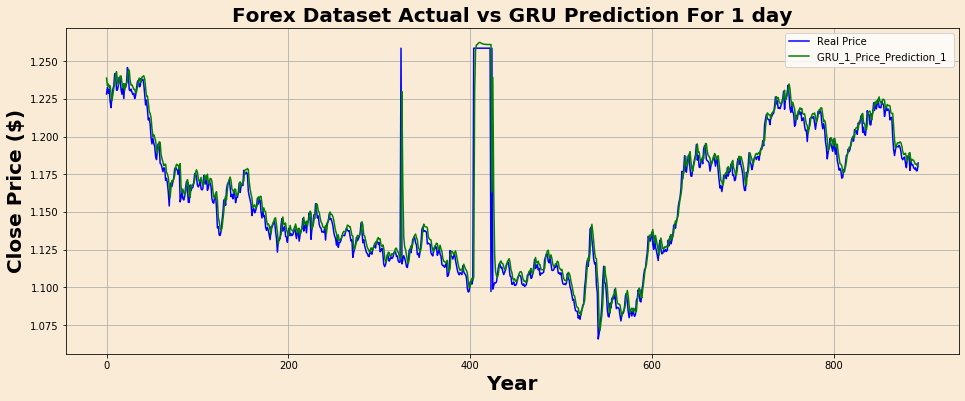

In [82]:
plt.figure(figsize = (16,6), facecolor = '#faebd7')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#faebd7')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'blue', label = 'Real Price')
plt.plot(GRU_1_Price_Prediction_1 , color = 'green', label = 'GRU_1_Price_Prediction_1 ')
plt.title('Forex Dataset Actual vs GRU Prediction For 1 day',fontweight = "bold",fontsize = 20)
plt.xlabel('Year', fontsize = 20,fontweight = "bold")
plt.ylabel('Close Price ($)', fontsize = 20,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [83]:
print ('R Squared =',r2_score(y_test_1, GRU_1_Price_Prediction_1 ))

R Squared = 0.9177768047480119


In [84]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, GRU_1_Price_Prediction_1 )) 

Mean Absolute Error: 0.0054823895849957565


In [86]:
#def mean_absolute_percentage_error(y_test_1, GRU_1_Price_Prediction_1 ): 
    #y_test_1, GRU_1_Price_Prediction_1 = np.array(y_test_1), np.array(GRU_1_Price_Prediction_1 )
    #return np.mean(np.abs((y_test_1 - GRU_1_Price_Prediction_1 ) / y_test_1)) * 100  
#print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, GRU_1_Price_Prediction_1 )) 

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, GRU_1_Price_Prediction_1 ))

In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, GRU_1_Price_Prediction_1 )))

# **>>>>>   The End One Day Price Prediction   <<<<<**